### **팀원 4: 인구 통계 및 고객 분석 담당** 🧑‍🤝‍🧑

매장의 주 고객층 특성을 분석하여 어떤 고객층을 확보했는지, 그리고 이 고객층이 폐업과 어떤 관련이 있는지 탐색합니다.

- **성별/연령별 고객 분석**: `M12_MAL_1020_RAT` ~ `M12_FME_60_RAT` 변수들을 분석하여 폐업 매장과 정상 매장 간의 고객 연령 및 성별 구성 비율에 차이가 있는지 확인합니다.
- **고객 유형 분석**: `RC_M1_SHC_RSD_UE_CLN_RAT`(거주 이용 고객), `RC_M1_SHC_WP_UE_CLN_RAT`(직장 이용 고객), `RC_M1_SHC_FLP_UE_CLN_RAT`(유동인구 이용 고객) 변수를 활용해 어떤 유형의 고객을 주로 확보하는 매장이 폐업에 더 취약한지 분석합니다.
- **고객 데이터의 한계점 파악**: 고객 정보가 `999999.9`로 결측 처리된 경우의 비율을 확인하고, 이 데이터를 모델링에 어떻게 활용할지 논의합니다. 예를 들어, '고객 정보 없음' 자체를 하나의 범주형 변수로 만들 수 있습니다.

## 필요한 라이브러리 불러오기

In [26]:
# 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Matplotlib에 나눔바른고딕 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

# 데이터 불러오기

In [5]:
df_0915 = pd.read_csv('/content/MyDrive/MyDrive/2025-2/2025 빅콘테스트/data/df_0915.csv')

In [6]:
df = df_0915.copy()
df.head()

,ENCODED_MCT,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D,TA_YM,MCT_OPE_MS_CN,...,MCT_UE_CLN_NEW_RAT,RC_M1_SHC_RSD_UE_CLN_RAT,RC_M1_SHC_WP_UE_CLN_RAT,RC_M1_SHC_FLP_UE_CLN_RAT,is_closed,start,end,year,month,YM
0,16184E93D9,서울 성동구 마장동,성우**,NaN,축산물,마장동,20130320,NaN,202405,2_10-25%,...,6.47,50.0,7.1,42.9,False,2013-03-20,NaN,2024,5,2024-05-01
1,16184E93D9,서울 성동구 마장동,성우**,NaN,축산물,마장동,20130320,NaN,202304,2_10-25%,...,5.05,25.0,6.3,68.8,False,2013-03-20,NaN,2023,4,2023-04-01
2,16184E93D9,서울 성동구 마장동,성우**,NaN,축산물,마장동,20130320,NaN,202308,2_10-25%,...,6.60,17.6,0.0,82.4,False,2013-03-20,NaN,2023,8,2023-08-01
3,16184E93D9,서울 성동구 마장동,성우**,NaN,축산물,마장동,20130320,NaN,202402,2_10-25%,...,9.60,15.8,5.3,78.9,False,2013-03-20,NaN,2024,2,2024-02-01
4,16184E93D9,서울 성동구 마장동,성우**,NaN,축산물,마장동,20130320,NaN,202406,2_10-25%,...,4.79,26.7,0.0,73.3,False,2013-03-20,NaN,2024,6,2024-06-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86566 entries, 0 to 86565
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENCODED_MCT               86566 non-null  object 
 1   MCT_BSE_AR                86566 non-null  object 
 2   MCT_NM                    86566 non-null  object 
 3   MCT_BRD_NUM               11725 non-null  object 
 4   HPSN_MCT_ZCD_NM           86566 non-null  object 
 5   HPSN_MCT_BZN_CD_NM        65147 non-null  object 
 6   ARE_D                     86566 non-null  int64  
 7   MCT_ME_D                  2334 non-null   float64
 8   TA_YM                     86566 non-null  int64  
 9   MCT_OPE_MS_CN             86566 non-null  object 
 10  RC_M1_SAA                 86566 non-null  object 
 11  RC_M1_TO_UE_CT            86566 non-null  object 
 12  RC_M1_UE_CUS_CN           86566 non-null  object 
 13  RC_M1_AV_NP_AT            86566 non-null  object 
 14  APV_CE

# ✅ 고객 정보 결측 여부 확인

- 한 매장은 24개월치 데이터가 있는데,

- 어떤 매장은 모든 월 데이터에 고객 비중 값이 잘 들어 있음

- 어떤 매장은 특정 월에는 고객 비중이 NaN → 데이터 수집 누락/특이 매장

- 어떤 매장은 24개월 내내 고객 비중 값이 NaN → 시스템상 고객 데이터가 아예 안 잡힌 매장일 수도 있음

=> 즉, ENCODED_MCT 기준으로 그룹화해서 해당 매장이 24개월 동안 고객층 데이터가 얼마나 충실히 기록됐는지 보는 게 핵심입니다.

In [8]:
# 매장별 24개월 중 결측 개수와 비율 계산
missing_status = (
    df.groupby("ENCODED_MCT")["M12_MAL_1020_RAT"]
    .agg(
        total_months = "count",             # 실제 데이터가 있는 월 개수
        missing_months = lambda x: x.isna().sum(),   # 결측 월 개수
        filled_months = lambda x: x.notna().sum()    # 채워진 월 개수
    )
)

# 전체 24개월 중 결측 비율 추가
missing_status["missing_ratio"] = missing_status["missing_months"] / 24

missing_status.head()


,total_months,missing_months,filled_months,missing_ratio
ENCODED_MCT,,,,
000F03E44A,24,0,24,0.000000
002816BA73,24,0,24,0.000000
003473B465,17,7,17,0.291667
003AC99735,24,0,24,0.000000
0041E4E5AE,24,0,24,0.000000


In [9]:
# 매장 상태 분류
def classify_missing(row):
    if row["missing_months"] == 0:
        return "완전 기록"
    elif row["missing_months"] == 24:
        return "전부 결측"
    else:
        return "부분 결측"

missing_status["status"] = missing_status.apply(classify_missing, axis=1)

# 상태별 매장 수 확인
print(missing_status["status"].value_counts())


status
완전 기록    3571
부분 결측     608
전부 결측       5
Name: count, dtype: int64


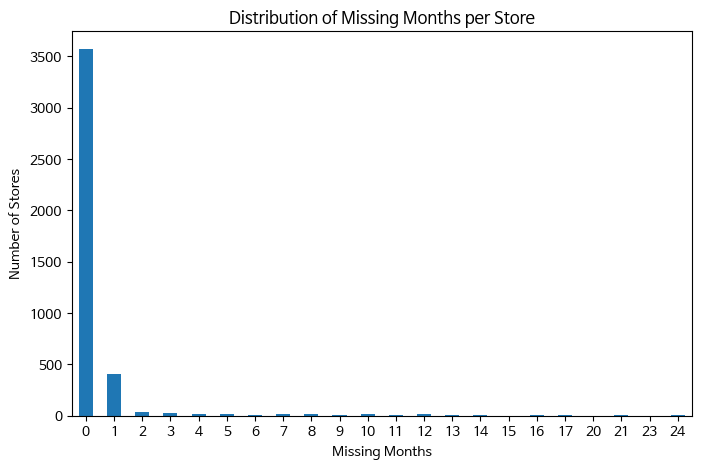

In [10]:
import matplotlib.pyplot as plt

# missing_months 분포 집계
missing_dist = missing_status['missing_months'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(8,5))
missing_dist.plot(kind='bar')

plt.xlabel("Missing Months")
plt.ylabel("Number of Stores")
plt.title("Distribution of Missing Months per Store")
plt.xticks(rotation=0)  # x축 라벨 가독성
plt.show()


In [11]:
# 값 직접 확인
print(missing_dist)


missing_months
0     3571
1      403
2       36
3       28
4       15
5       18
6        9
7       15
8       13
9        8
10      14
11       7
12      18
13       4
14       3
15       2
16       4
17       3
20       2
21       5
23       1
24       5
Name: count, dtype: int64


특정 월에만 결측이 몰려 있는지(예: 코로나 시기), 아니면 랜덤하게 발생하는지 확인

In [12]:
# 각 월(TA_YM)별 M12_MAL_1020_RAT 결측 비율
missing_by_month = df.groupby("TA_YM")["M12_MAL_1020_RAT"].apply(lambda x: x.isna().mean())

print(missing_by_month)


TA_YM
202301    0.023430
202302    0.024194
202303    0.024476
202304    0.024664
202305    0.024684
202306    0.026196
202307    0.024932
202308    0.024527
202309    0.023012
202310    0.020713
202311    0.022059
202312    0.020129
202401    0.023448
202402    0.023154
202403    0.022635
202404    0.023379
202405    0.024804
202406    0.021134
202407    0.021651
202408    0.022619
202409    0.021593
202410    0.025208
202411    0.023002
202412    0.021425
Name: M12_MAL_1020_RAT, dtype: float64


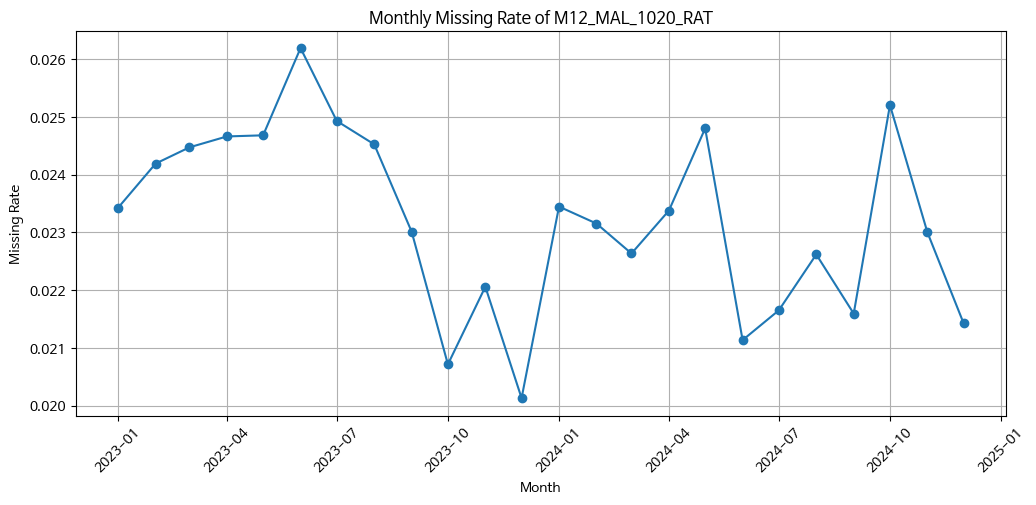

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# missing_by_month 시리즈 (TA_YM : 결측률) 기준
missing_by_month.index = pd.to_datetime(missing_by_month.index.astype(str), format="%Y%m")

# 라인 그래프
plt.figure(figsize=(12,5))
plt.plot(missing_by_month.index, missing_by_month.values, marker='o')
plt.xticks(rotation=45)

plt.title("Monthly Missing Rate of M12_MAL_1020_RAT")
plt.xlabel("Month")
plt.ylabel("Missing Rate")
plt.grid(True)
plt.show()



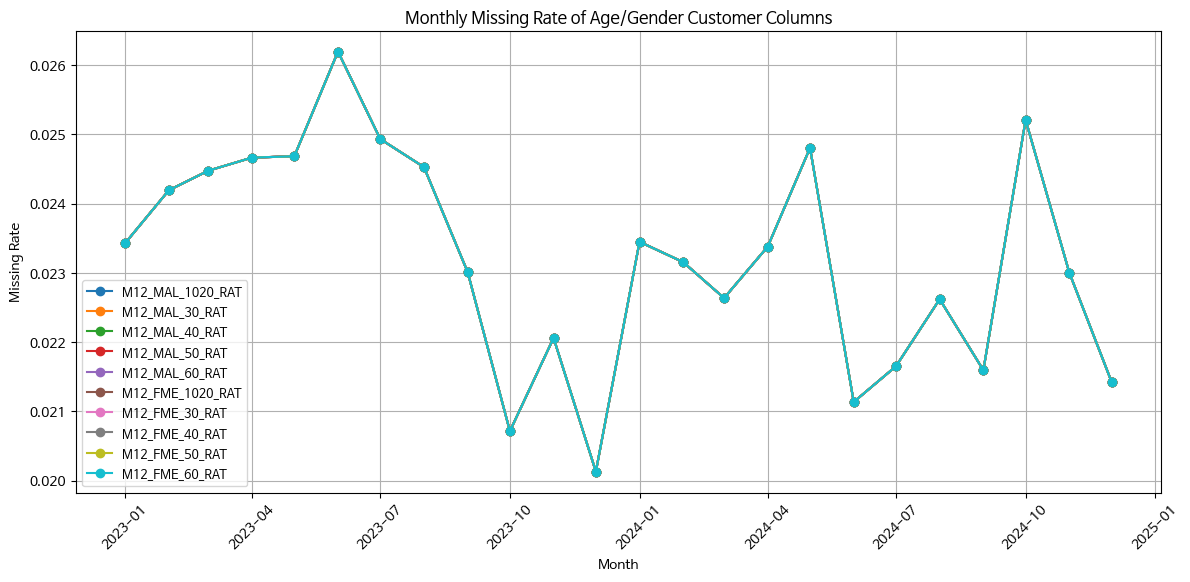

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# age_gender_cols: 분석할 모든 연령/성별 고객 컬럼 리스트
# 예:
age_gender_cols = [
     'M12_MAL_1020_RAT', 'M12_MAL_30_RAT', 'M12_MAL_40_RAT',
     'M12_MAL_50_RAT', 'M12_MAL_60_RAT',
    'M12_FME_1020_RAT', 'M12_FME_30_RAT', 'M12_FME_40_RAT',
     'M12_FME_50_RAT', 'M12_FME_60_RAT'
]

plt.figure(figsize=(14,6))

for col in age_gender_cols:
    missing_by_month = df.groupby("TA_YM")[col].apply(lambda x: x.isna().mean())
    missing_by_month.index = pd.to_datetime(missing_by_month.index.astype(str), format="%Y%m")

    plt.plot(missing_by_month.index, missing_by_month.values, marker='o', label=col)

plt.title("Monthly Missing Rate of Age/Gender Customer Columns")
plt.xlabel("Month")
plt.ylabel("Missing Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(fontsize=9)
plt.show()


=> 결과를 보면
- 월별 결측률이 대략 2~2.6% 정도로 안정적
- 특정 시기나 사건(예: 코로나)과 관련해서 뚜렷하게 증가/감소하는 패턴은 없음

## 선형 보간
- 모든 고객 연령·성별 컬럼(age_gender_cols)에 대해 선형 보간
- 폐업일 이후는 NaN 유지

In [37]:
import pandas as pd
import numpy as np

# 보간할 컬럼 리스트 (연령/성별 고객 비율)
age_gender_cols = [
    'M12_MAL_1020_RAT', 'M12_MAL_30_RAT', 'M12_MAL_40_RAT', 'M12_MAL_50_RAT', 'M12_MAL_60_RAT',
    'M12_FME_1020_RAT', 'M12_FME_30_RAT', 'M12_FME_40_RAT', 'M12_FME_50_RAT', 'M12_FME_60_RAT'
]

# -------------------------------
# 부분 결측 매장(1~5개월 결측)
# -------------------------------
missing_status["status"] = missing_status.apply(lambda row:
                                               "완전 기록" if row["missing_months"]==0 else
                                               ("전부 결측" if row["missing_months"]==24 else "부분 결측"), axis=1)
partial_missing_stores = missing_status[missing_status["status"]=="부분 결측"].index

df_partial = df[df["ENCODED_MCT"].isin(partial_missing_stores)].copy()

# 날짜 컬럼 변환
df_partial["TA_YM_dt"] = pd.to_datetime(df_partial["TA_YM"].astype(str), format="%Y%m")
df_partial["MCT_ME_dt"] = pd.to_datetime(df_partial["MCT_ME_D"].astype('Int64').astype(str),
                                       format="%Y%m", errors='coerce')

# 매장별, 월별 정렬
df_partial = df_partial.sort_values(["ENCODED_MCT", "TA_YM_dt"])

# -------------------------------
# 그룹별 선형 보간 함수
# -------------------------------
def interp_with_close_all(group):
    close_date = group["MCT_ME_dt"].iloc[0] if not pd.isna(group["MCT_ME_dt"].iloc[0]) else pd.Timestamp.max
    # 보간
    group[age_gender_cols] = group[age_gender_cols].interpolate(method="linear", limit_direction="both")
    # 폐업 이후 NaN 유지
    group.loc[group["TA_YM_dt"] > close_date, age_gender_cols] = pd.NA
    return group

# 매장별 적용
df_partial = df_partial.groupby("ENCODED_MCT", group_keys=False).apply(interp_with_close_all)

# -------------------------------
# 원본 데이터에 업데이트
# -------------------------------
df_1 = df.copy()
df_1.set_index(["ENCODED_MCT","TA_YM"], inplace=True)
df_partial.set_index(["ENCODED_MCT","TA_YM"], inplace=True)

for col in age_gender_cols:
    df_1[col].update(df_partial[col])

df_1.reset_index(inplace=True)

# -------------------------------
# 결과 확인
# -------------------------------
missing_status_after = df_1.groupby("ENCODED_MCT")[age_gender_cols].apply(lambda x: x.isna().sum())
print(missing_status_after.head())


             M12_MAL_1020_RAT  M12_MAL_30_RAT  M12_MAL_40_RAT  M12_MAL_50_RAT  \
ENCODED_MCT                                                                     
000F03E44A                  0               0               0               0   
002816BA73                  0               0               0               0   
003473B465                  0               0               0               0   
003AC99735                  0               0               0               0   
0041E4E5AE                  0               0               0               0   

             M12_MAL_60_RAT  M12_FME_1020_RAT  M12_FME_30_RAT  M12_FME_40_RAT  \
ENCODED_MCT                                                                     
000F03E44A                0                 0               0               0   
002816BA73                0                 0               0               0   
003473B465                0                 0               0               0   
003AC99735                0

In [38]:
# 매장별 각 연령/성별 컬럼 결측 개수 계산
missing_status_after_all = df_1.groupby("ENCODED_MCT")[age_gender_cols].apply(lambda x: x.isna().sum())

# 확인: 상위 5개 매장
print(missing_status_after_all.head())

# 만약 전체 분포 확인
for col in age_gender_cols:
    print(f"\n컬럼: {col}")
    missing_dist = missing_status_after_all[col].value_counts().sort_index()
    print(missing_dist)


             M12_MAL_1020_RAT  M12_MAL_30_RAT  M12_MAL_40_RAT  M12_MAL_50_RAT  \
ENCODED_MCT                                                                     
000F03E44A                  0               0               0               0   
002816BA73                  0               0               0               0   
003473B465                  0               0               0               0   
003AC99735                  0               0               0               0   
0041E4E5AE                  0               0               0               0   

             M12_MAL_60_RAT  M12_FME_1020_RAT  M12_FME_30_RAT  M12_FME_40_RAT  \
ENCODED_MCT                                                                     
000F03E44A                0                 0               0               0   
002816BA73                0                 0               0               0   
003473B465                0                 0               0               0   
003AC99735                0

missing_months == 5 인 매장 확인

In [ ]:
# missing_months == 5 인 매장 확인
df_1.groupby("ENCODED_MCT")["M12_MAL_1020_RAT"].apply(lambda x: x.isna().sum()).loc[lambda x: x==5]
df_1[df_1['ENCODED_MCT']=='41CB64C3C9']

,ENCODED_MCT,TA_YM,MCT_BSE_AR,MCT_NM,MCT_BRD_NUM,HPSN_MCT_ZCD_NM,HPSN_MCT_BZN_CD_NM,ARE_D,MCT_ME_D,MCT_OPE_MS_CN,...,MCT_UE_CLN_NEW_RAT,RC_M1_SHC_RSD_UE_CLN_RAT,RC_M1_SHC_WP_UE_CLN_RAT,RC_M1_SHC_FLP_UE_CLN_RAT,is_closed,start,end,year,month,YM
39217,41CB64C3C9,202411,서울 성동구 아차산로7길 15-1.,다온**,NaN,식료품,성수,20240828,NaN,6_90%초과(하위 10% 이하),...,0.0,NaN,NaN,NaN,False,2024-08-28,NaN,2024,11,2024-11-01
39218,41CB64C3C9,202412,서울 성동구 아차산로7길 15-1.,다온**,NaN,식료품,성수,20240828,NaN,6_90%초과(하위 10% 이하),...,0.0,NaN,NaN,NaN,False,2024-08-28,NaN,2024,12,2024-12-01
39219,41CB64C3C9,202410,서울 성동구 아차산로7길 15-1.,다온**,NaN,식료품,성수,20240828,NaN,6_90%초과(하위 10% 이하),...,0.0,NaN,NaN,NaN,False,2024-08-28,NaN,2024,10,2024-10-01
39220,41CB64C3C9,202408,서울 성동구 아차산로7길 15-1.,다온**,NaN,식료품,성수,20240828,NaN,6_90%초과(하위 10% 이하),...,100.0,NaN,NaN,NaN,False,2024-08-28,NaN,2024,8,2024-08-01
39221,41CB64C3C9,202409,서울 성동구 아차산로7길 15-1.,다온**,NaN,식료품,성수,20240828,NaN,6_90%초과(하위 10% 이하),...,0.0,NaN,NaN,NaN,False,2024-08-28,NaN,2024,9,2024-09-01


# ✅ 인구 통계 및 고객 분석

## 1️⃣ 결측 패턴과 폐업 위험의 관계 분석

결측 상태별 폐업률:
        total_stores  closed_stores  closure_rate
status                                           
부분 결측            608             19      0.031250
완전 기록           3571            108      0.030244
전부 결측              5              0      0.000000


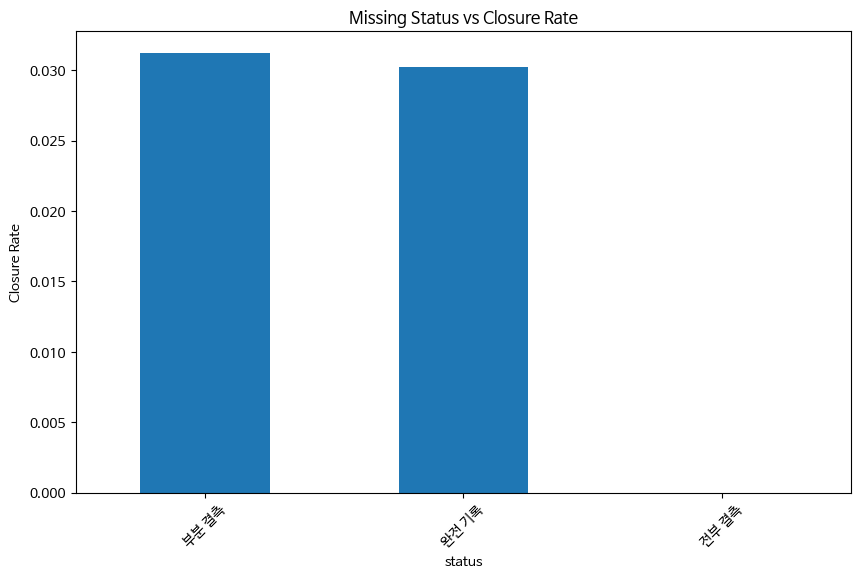

In [39]:
# 폐업 여부 확인 (MCT_ME_D가 있으면 폐업)
df['is_closed'] = df['MCT_ME_D'].notna()

# 매장별 폐업 여부와 결측 상태 결합
store_analysis = missing_status.reset_index().merge(
    df[['ENCODED_MCT', 'is_closed']].drop_duplicates(),
    on='ENCODED_MCT'
)

# 결측 상태별 폐업률 계산
closure_by_missing = store_analysis.groupby('status')['is_closed'].agg(['count', 'sum', 'mean'])
closure_by_missing.columns = ['total_stores', 'closed_stores', 'closure_rate']

print("결측 상태별 폐업률:")
print(closure_by_missing)

# 시각화
plt.figure(figsize=(10, 6))
closure_by_missing['closure_rate'].plot(kind='bar')
plt.title('Missing Status vs Closure Rate')
plt.ylabel('Closure Rate')
plt.xticks(rotation=45)
plt.show()

**보간 데이터에서 분석**

결측 상태별 폐업률:
        total_stores  closed_stores  closure_rate
status                                           
부분 결측              5              1      0.200000
완전 기록           4174            126      0.030187
전부 결측              5              0      0.000000


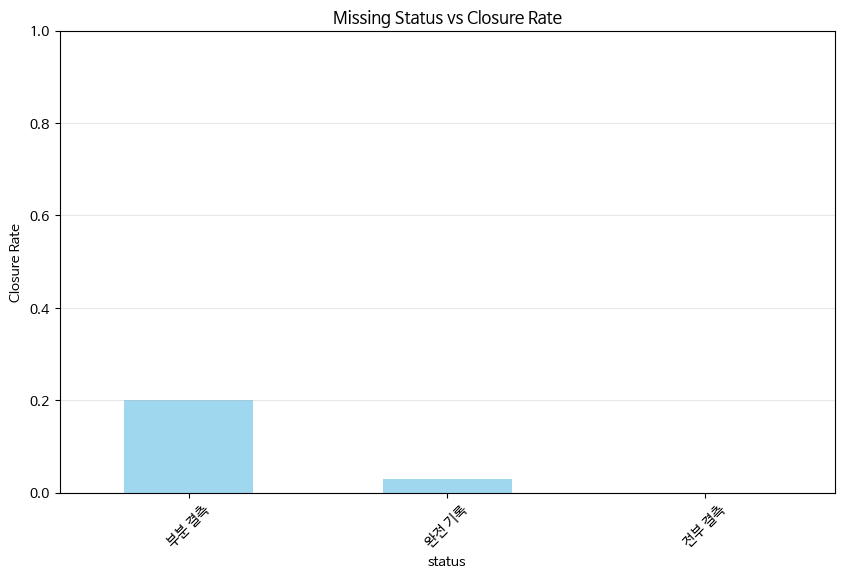

In [45]:
# 결측 패턴과 폐업 위험의 관계 분석 (df_1 기준)

# 매장별 모든 연령/성별 고객 컬럼 결측 개수 계산
missing_status_all = df_1.groupby("ENCODED_MCT")[age_gender_cols].apply(lambda x: x.isna().sum())

# 매장별 총 결측 개수와 상태 지정
missing_status_all['total_missing'] = missing_status_all.sum(axis=1)

def classify_missing(row):
    if row['total_missing'] == 0:
        return "완전 기록"
    elif row['total_missing'] == len(age_gender_cols) * 24:  # 24개월 전부 결측
        return "전부 결측"
    else:
        return "부분 결측"

missing_status_all['status'] = missing_status_all.apply(classify_missing, axis=1)
missing_status_all.reset_index(inplace=True)

# df_1의 is_closed와 결합
store_analysis = missing_status_all.merge(
    df_1[['ENCODED_MCT', 'is_closed']].drop_duplicates(),
    on='ENCODED_MCT'
)

# 결측 상태별 폐업률 계산
closure_by_missing = store_analysis.groupby('status')['is_closed'].agg(['count', 'sum', 'mean'])
closure_by_missing.columns = ['total_stores', 'closed_stores', 'closure_rate']

print("결측 상태별 폐업률:")
print(closure_by_missing)

# 시각화
plt.figure(figsize=(10, 6))
closure_by_missing['closure_rate'].plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Missing Status vs Closure Rate')
plt.ylabel('Closure Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.show()


## 2️⃣ 성별/연령별 고객 분석

사용할 컬럼: M12_MAL_1020_RAT ~ M12_FME_60_RAT

완전 기록 매장만 분석

### 2.1. 폐업 여부와 고객 구성

목표: 폐업 매장(is_closed=True) vs 정상 매장(is_closed=False)의 고객 구성 비교

is_closed 값 확인:
is_closed
False    24
True     24
Name: count, dtype: int64


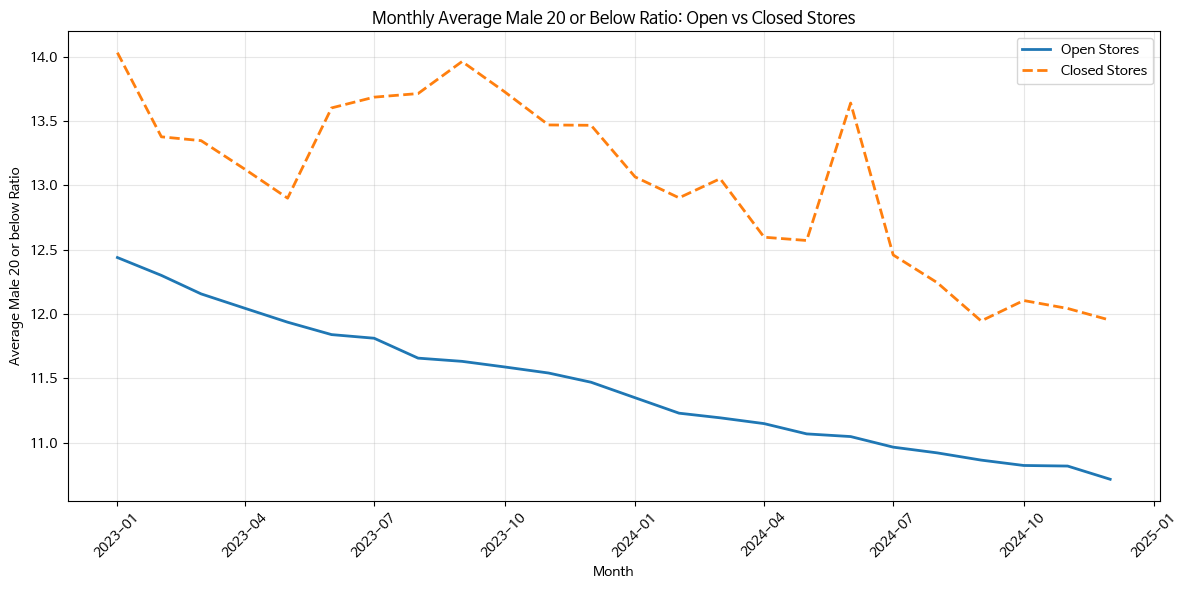

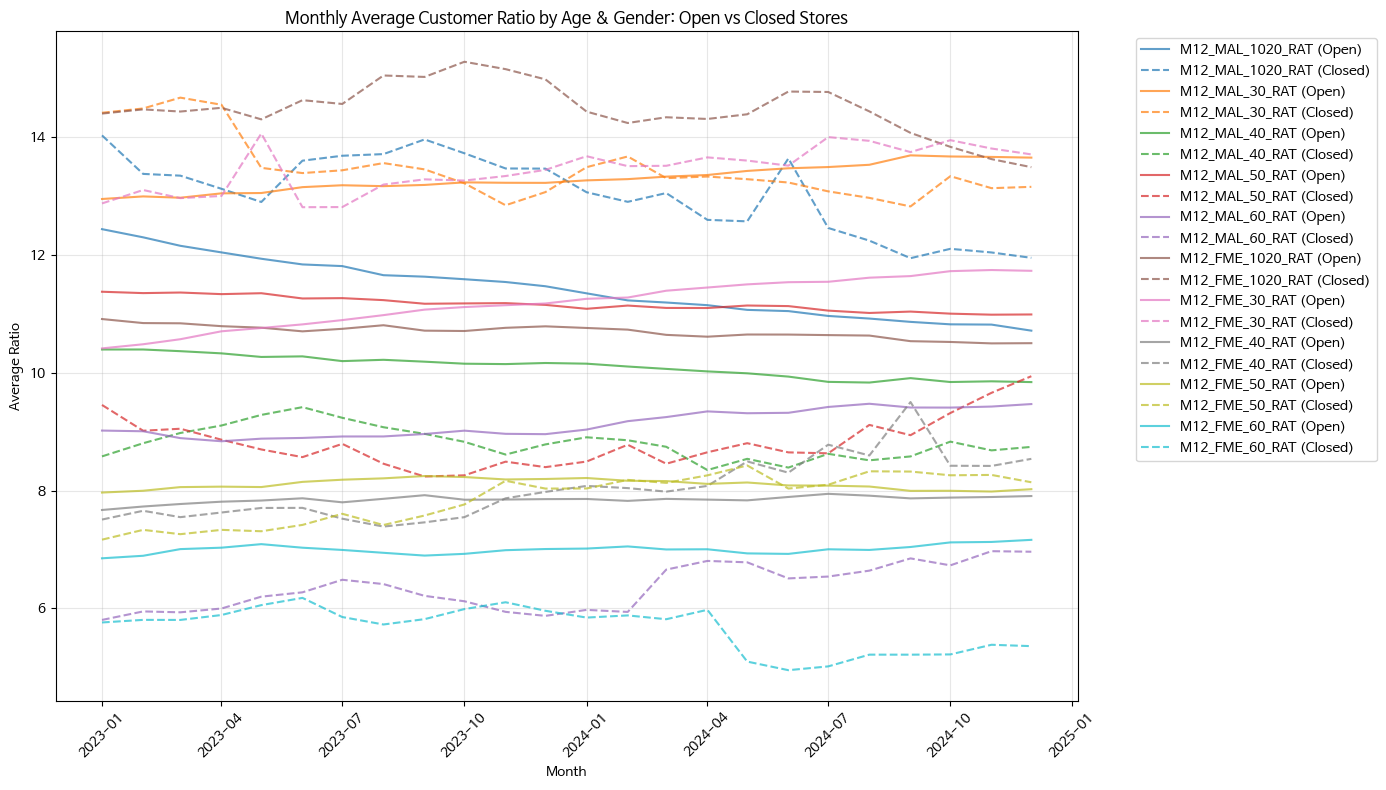

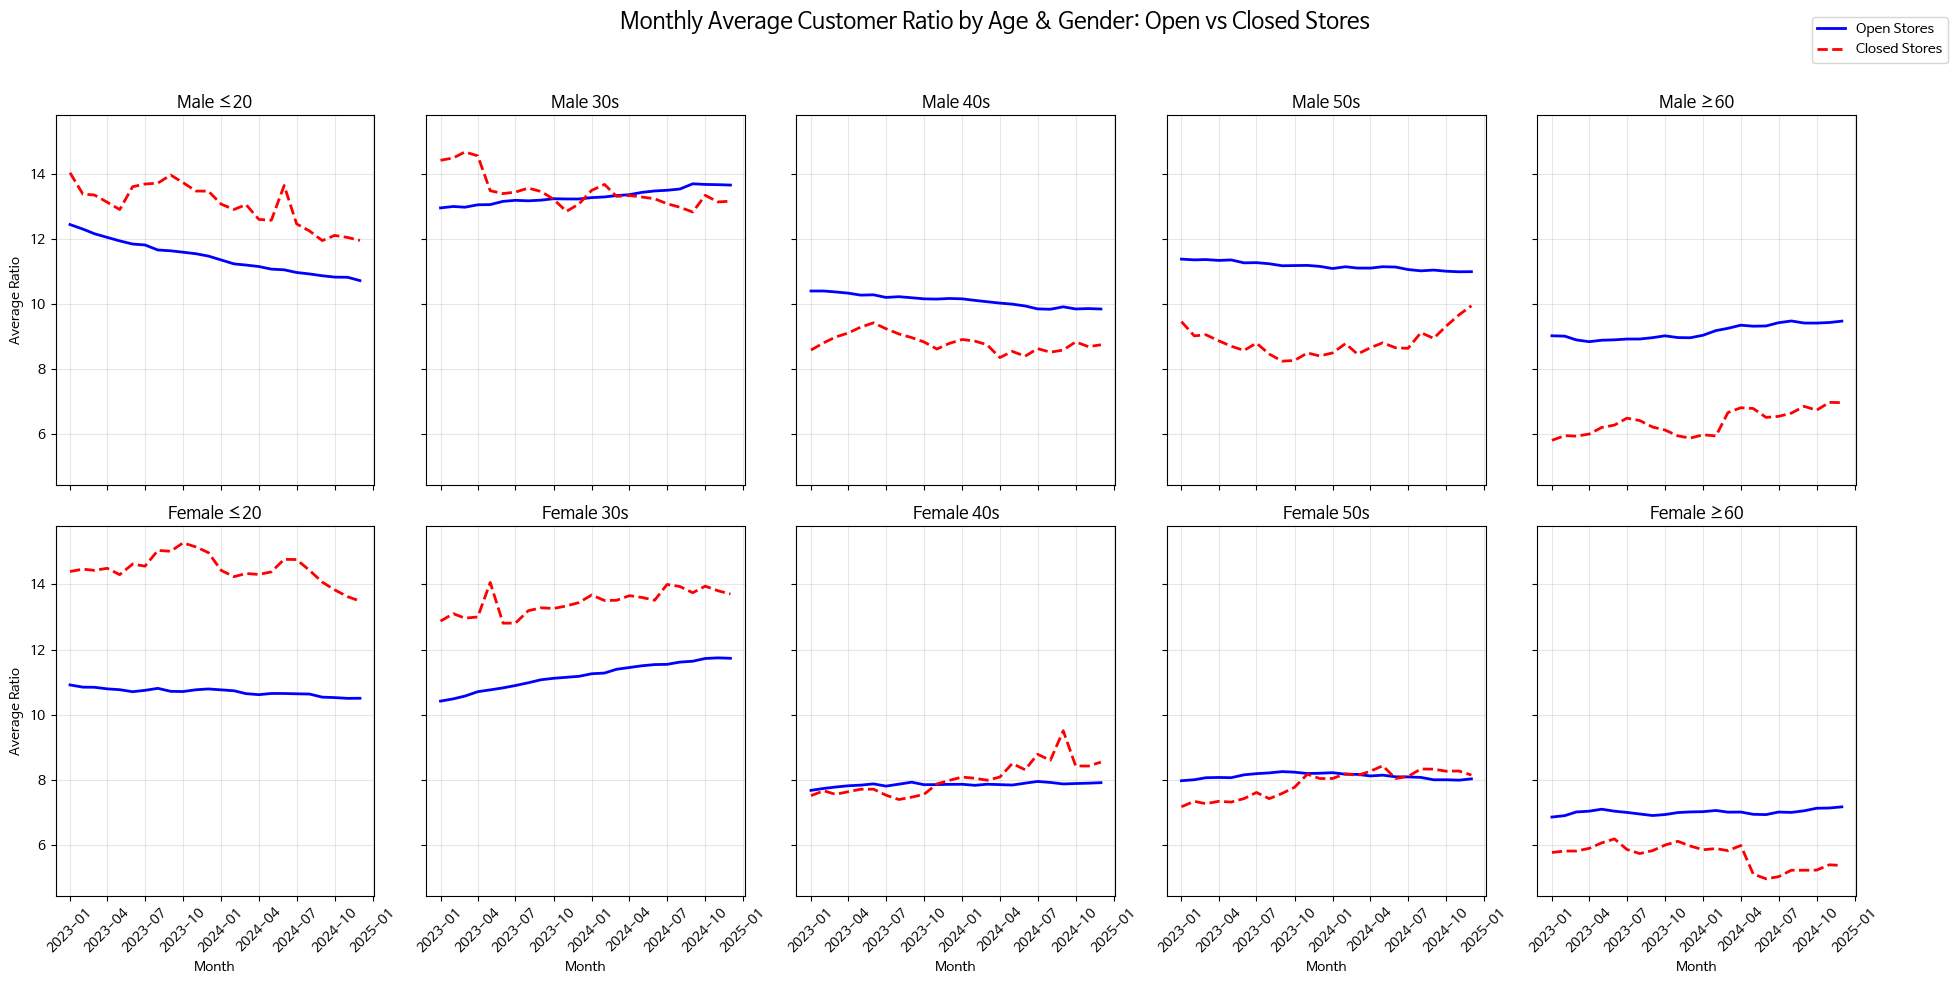


=== 기본 통계 정보 ===
전체 데이터 포인트 수: 86566
분석 기간: 2023-01-01 00:00:00 ~ 2024-12-01 00:00:00
폐업 매장 비율: 2.70% (2334/86566)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 존재 여부 확인
if 'df_1' not in locals():
    print("Error: df_1 변수가 정의되지 않았습니다.")
    exit()

# 성별/연령별 컬럼 리스트
age_cols = [
    "M12_MAL_1020_RAT", "M12_MAL_30_RAT", "M12_MAL_40_RAT", "M12_MAL_50_RAT", "M12_MAL_60_RAT",
    "M12_FME_1020_RAT", "M12_FME_30_RAT", "M12_FME_40_RAT", "M12_FME_50_RAT", "M12_FME_60_RAT"
]

# 필요한 컬럼들이 존재하는지 확인
missing_cols = [col for col in age_cols + ["TA_YM", "is_closed"] if col not in df_1.columns]
if missing_cols:
    print(f"Error: 다음 컬럼들이 데이터에 없습니다: {missing_cols}")
    exit()

# TA_YM을 datetime으로 변환 (월별 시계열)
df_1["TA_YM_dt"] = pd.to_datetime(df_1["TA_YM"].astype(str), format="%Y%m")

# 월별로 폐업/정상 매장 평균 계산
monthly_age_summary = df_1.groupby(["TA_YM_dt", "is_closed"])[age_cols].mean().reset_index()

# 데이터 확인
print("is_closed 값 확인:")
print(monthly_age_summary["is_closed"].value_counts())

# 1. 단일 컬럼 시각화 (M12_MAL_1020_RAT)
plt.figure(figsize=(12,6))
for status in [False, True]:  # False(정상), True(폐업) 순서로
    subset = monthly_age_summary[monthly_age_summary["is_closed"]==status]
    if not subset.empty:
        label = "Open Stores" if not status else "Closed Stores"
        linestyle = "-" if not status else "--"
        plt.plot(subset["TA_YM_dt"], subset["M12_MAL_1020_RAT"],
                label=label, linestyle=linestyle, linewidth=2)

plt.xlabel("Month")
plt.ylabel("Average Male 20 or below Ratio")
plt.title("Monthly Average Male 20 or Below Ratio: Open vs Closed Stores")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. 모든 컬럼 한 번에 시각화
plt.figure(figsize=(14,8))

# 색상 팔레트
colors = plt.cm.tab10.colors

# 각 연령/성별 컬럼 반복
for i, col in enumerate(age_cols):
    for status in [False, True]:
        subset = monthly_age_summary[monthly_age_summary["is_closed"]==status]
        if not subset.empty:
            # 폐업/정상 구분: linestyle
            linestyle = "-" if not status else "--"
            label = f"{col} ({'Open' if not status else 'Closed'})"
            plt.plot(subset["TA_YM_dt"], subset[col],
                    label=label, color=colors[i], linestyle=linestyle, alpha=0.7)

plt.xlabel("Month")
plt.ylabel("Average Ratio")
plt.title("Monthly Average Customer Ratio by Age & Gender: Open vs Closed Stores")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Subplot으로 각각 분리 (수정된 버전)
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()

# 색상 정의
open_color = 'blue'
closed_color = 'red'

for i, col in enumerate(age_cols):
    ax = axes[i]

    # 각 상태별로 플롯
    for status in [False, True]:
        subset = monthly_age_summary[monthly_age_summary["is_closed"]==status]
        if not subset.empty:
            linestyle = "-" if not status else "--"
            color = open_color if not status else closed_color
            label = "Open" if not status else "Closed"
            ax.plot(subset["TA_YM_dt"], subset[col],
                   label=label, linestyle=linestyle, color=color, linewidth=2)

    # 컬럼명을 더 읽기 쉽게 변환
    title_map = {
        "M12_MAL_1020_RAT": "Male ≤20",
        "M12_MAL_30_RAT": "Male 30s",
        "M12_MAL_40_RAT": "Male 40s",
        "M12_MAL_50_RAT": "Male 50s",
        "M12_MAL_60_RAT": "Male ≥60",
        "M12_FME_1020_RAT": "Female ≤20",
        "M12_FME_30_RAT": "Female 30s",
        "M12_FME_40_RAT": "Female 40s",
        "M12_FME_50_RAT": "Female 50s",
        "M12_FME_60_RAT": "Female ≥60"
    }

    ax.set_title(title_map.get(col, col), fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

    # 축 레이블
    if i >= 5:  # 아래쪽 행
        ax.set_xlabel("Month")
    if i % 5 == 0:  # 왼쪽 열
        ax.set_ylabel("Average Ratio")

# 수정된 범례 (올바른 순서로)
fig.legend(["Open Stores", "Closed Stores"],
          loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.suptitle("Monthly Average Customer Ratio by Age & Gender: Open vs Closed Stores",
            fontsize=16)
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()

# 4. 추가: 기본 통계 정보 출력
print("\n=== 기본 통계 정보 ===")
print(f"전체 데이터 포인트 수: {len(df_1)}")
print(f"분석 기간: {df_1['TA_YM_dt'].min()} ~ {df_1['TA_YM_dt'].max()}")

if 'is_closed' in df_1.columns:
    closed_count = df_1['is_closed'].sum()
    total_count = len(df_1)
    print(f"폐업 매장 비율: {closed_count/total_count*100:.2f}% ({closed_count}/{total_count})")

### 2.2 고객층 구성 분석

In [40]:
# 완전 기록 매장만 필터링
complete_stores = missing_status[missing_status['status'] == '완전 기록'].index
df_complete = df[df['ENCODED_MCT'].isin(complete_stores)].copy()

# 고객 연령/성별 컬럼 정의
age_gender_cols = [
    'M12_MAL_1020_RAT', 'M12_MAL_30_RAT', 'M12_MAL_40_RAT', 'M12_MAL_50_RAT', 'M12_MAL_60_RAT',
    'M12_FME_1020_RAT', 'M12_FME_30_RAT', 'M12_FME_40_RAT', 'M12_FME_50_RAT', 'M12_FME_60_RAT'
]

# 매장별 평균 고객 구성 계산
customer_profile = df_complete.groupby('ENCODED_MCT')[age_gender_cols].mean()

# 폐업 여부 추가
customer_profile = customer_profile.merge(
    df_complete[['ENCODED_MCT', 'is_closed']].drop_duplicates().set_index('ENCODED_MCT'),
    left_index=True, right_index=True
)

# 폐업/정상 매장 간 고객 구성 비교
comparison = customer_profile.groupby('is_closed')[age_gender_cols].mean()

print("\n폐업 vs 정상 매장 고객 구성 비교:")
print(comparison.T)



폐업 vs 정상 매장 고객 구성 비교:
is_closed             False      True 
M12_MAL_1020_RAT  11.704236  13.319863
M12_MAL_30_RAT    13.546224  13.146479
M12_MAL_40_RAT    10.036486   9.393619
M12_MAL_50_RAT    11.037335   9.601072
M12_MAL_60_RAT     8.943637   6.128474
M12_FME_1020_RAT  10.934876  14.137905
M12_FME_30_RAT    11.393046  12.815502
M12_FME_40_RAT     7.771141   8.549178
M12_FME_50_RAT     8.012108   8.096956
M12_FME_60_RAT     6.621922   4.813078


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (시스템에 맞게 조정)
# plt.rcParams['font.family'] = ['DejaVu Sans', 'Malgun Gothic', 'AppleGothic']
# plt.rcParams['axes.unicode_minus'] = False

In [42]:
def visualize_customer_profile_analysis(customer_profile, age_gender_cols):
    """
    고객층 구성 분석 결과를 종합적으로 시각화하는 함수
    """

    print("=== 고객층 구성 분석 시각화 ===\n")

    # 폐업/정상 매장 간 고객 구성 비교 계산
    comparison = customer_profile.groupby('is_closed')[age_gender_cols].mean()

    # 통계적 유의성 검정
    significance_results = []
    for col in age_gender_cols:
        closed_group = customer_profile[customer_profile['is_closed'] == True][col]
        open_group = customer_profile[customer_profile['is_closed'] == False][col]

        if len(closed_group) > 0 and len(open_group) > 0:
            t_stat, p_value = stats.ttest_ind(closed_group, open_group)
            significance_results.append({
                'column': col,
                't_statistic': t_stat,
                'p_value': p_value,
                'significant': p_value < 0.05,
                'closed_mean': closed_group.mean(),
                'open_mean': open_group.mean(),
                'difference': closed_group.mean() - open_group.mean()
            })

    sig_df = pd.DataFrame(significance_results)

    # 기본 통계
    total_stores = len(customer_profile)
    closed_stores = customer_profile['is_closed'].sum()
    closure_rate = closed_stores / total_stores * 100

    print(f"분석 대상: 완전 기록 매장 {total_stores:,}개")
    print(f"폐업 매장: {closed_stores:,}개 ({closure_rate:.2f}%)")
    print(f"정상 매장: {total_stores - closed_stores:,}개 ({100-closure_rate:.2f}%)\n")

    # 시각화 시작
    fig = plt.figure(figsize=(20, 16))

    # 1. 히트맵으로 폐업/정상 매장 간 고객 구성 비교
    ax1 = plt.subplot(3, 3, (1, 2))

    # 컬럼명 한글로 변환
    col_labels = {
        'M12_MAL_1020_RAT': '남성 20세이하',
        'M12_MAL_30_RAT': '남성 30대',
        'M12_MAL_40_RAT': '남성 40대',
        'M12_MAL_50_RAT': '남성 50대',
        'M12_MAL_60_RAT': '남성 60세이상',
        'M12_FME_1020_RAT': '여성 20세이하',
        'M12_FME_30_RAT': '여성 30대',
        'M12_FME_40_RAT': '여성 40대',
        'M12_FME_50_RAT': '여성 50대',
        'M12_FME_60_RAT': '여성 60세이상'
    }

    comparison_renamed = comparison.rename(columns=col_labels)
    comparison_renamed.index = ['정상 매장', '폐업 매장']

    sns.heatmap(comparison_renamed.T, annot=True, fmt='.2f', cmap='RdYlBu_r',
                center=comparison_renamed.values.mean(), ax=ax1)
    ax1.set_title('폐업 vs 정상 매장 고객 구성 비교 (%)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('')
    ax1.set_ylabel('')

    # 2. 차이값 막대 그래프
    ax2 = plt.subplot(3, 3, 3)

    differences = comparison.iloc[1] - comparison.iloc[0]  # 폐업 - 정상
    colors = ['red' if x > 0 else 'blue' for x in differences.values]

    bars = ax2.barh(range(len(differences)), differences.values, color=colors, alpha=0.7)
    ax2.set_yticks(range(len(differences)))
    ax2.set_yticklabels([col_labels[col] for col in differences.index], fontsize=9)
    ax2.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax2.set_xlabel('차이 (폐업 매장 - 정상 매장) %p')
    ax2.set_title('고객 구성 차이', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='x')

    # 통계적 유의성 표시
    for i, (bar, sig) in enumerate(zip(bars, sig_df['significant'])):
        if sig:
            ax2.text(bar.get_width() + 0.1 if bar.get_width() > 0 else bar.get_width() - 0.1,
                    bar.get_y() + bar.get_height()/2, '*',
                    ha='left' if bar.get_width() > 0 else 'right', va='center',
                    fontsize=16, color='red', fontweight='bold')

    # 3. 연령대별 성별 분포 (정상 매장)
    ax3 = plt.subplot(3, 3, 4)

    age_groups = ['20세이하', '30대', '40대', '50대', '60세이상']
    male_cols = [col for col in age_gender_cols if 'MAL' in col]
    female_cols = [col for col in age_gender_cols if 'FME' in col]

    open_stores = comparison.loc[False]  # is_closed == False
    male_values = [open_stores[col] for col in male_cols]
    female_values = [open_stores[col] for col in female_cols]

    x = np.arange(len(age_groups))
    width = 0.35

    bars1 = ax3.bar(x - width/2, male_values, width, label='남성', color='skyblue', alpha=0.8)
    bars2 = ax3.bar(x + width/2, female_values, width, label='여성', color='pink', alpha=0.8)

    ax3.set_xlabel('연령대')
    ax3.set_ylabel('비율 (%)')
    ax3.set_title('정상 매장의 연령별 성별 고객 구성', fontsize=12, fontweight='bold')
    ax3.set_xticks(x)
    ax3.set_xticklabels(age_groups)
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')

    # 값 표시
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=9)

    # 4. 연령대별 성별 분포 (폐업 매장)
    ax4 = plt.subplot(3, 3, 5)

    closed_stores = comparison.loc[True]  # is_closed == True
    male_values_closed = [closed_stores[col] for col in male_cols]
    female_values_closed = [closed_stores[col] for col in female_cols]

    bars3 = ax4.bar(x - width/2, male_values_closed, width, label='남성', color='lightcoral', alpha=0.8)
    bars4 = ax4.bar(x + width/2, female_values_closed, width, label='여성', color='lightsteelblue', alpha=0.8)

    ax4.set_xlabel('연령대')
    ax4.set_ylabel('비율 (%)')
    ax4.set_title('폐업 매장의 연령별 성별 고객 구성', fontsize=12, fontweight='bold')
    ax4.set_xticks(x)
    ax4.set_xticklabels(age_groups)
    ax4.legend()
    ax4.grid(True, alpha=0.3, axis='y')

    # 값 표시
    for bars in [bars3, bars4]:
        for bar in bars:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=9)

    # 5. 주요 고객층 분석 (파이 차트)
    ax5 = plt.subplot(3, 3, 6)

    # 가장 높은 비율을 가진 고객층 찾기
    open_main_segments = open_stores.nlargest(4)
    closed_main_segments = closed_stores.nlargest(4)

    # 정상 매장 주요 고객층
    segment_names = [col_labels[col] for col in open_main_segments.index]
    ax5.pie(open_main_segments.values, labels=segment_names, autopct='%1.1f%%',
            startangle=90, colors=plt.cm.Set3.colors)
    ax5.set_title('정상 매장 주요 고객층 (상위 4개)', fontsize=12, fontweight='bold')

    # 6. 통계적 유의성 결과 테이블
    ax6 = plt.subplot(3, 3, 7)
    ax6.axis('tight')
    ax6.axis('off')

    # 유의한 차이가 있는 고객층만 표시
    significant_results = sig_df[sig_df['significant']].copy()
    if len(significant_results) > 0:
        significant_results['column_kr'] = significant_results['column'].map(col_labels)
        table_data = significant_results[['column_kr', 'difference', 'p_value']].round(4)
        table_data.columns = ['고객층', '차이(%p)', 'p-value']

        table = ax6.table(cellText=table_data.values, colLabels=table_data.columns,
                         cellLoc='center', loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.5)
        ax6.set_title('통계적으로 유의한 고객층 차이', fontsize=12, fontweight='bold')
    else:
        ax6.text(0.5, 0.5, '통계적으로 유의한\n고객층 차이 없음',
                transform=ax6.transAxes, ha='center', va='center',
                fontsize=14, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        ax6.set_title('통계적 유의성 검정 결과', fontsize=12, fontweight='bold')

    # 7. 고객 다양성 지수 분석
    ax7 = plt.subplot(3, 3, 8)

    # 고객 구성의 다양성 계산 (Shannon Entropy)
    def calculate_diversity_index(row):
        # 0인 값 제거하고 정규화
        values = row[age_gender_cols].values
        values = values[values > 0]
        if len(values) == 0:
            return 0
        # 비율로 변환
        proportions = values / values.sum()
        # Shannon entropy 계산
        return -np.sum(proportions * np.log(proportions))

    customer_profile['diversity_index'] = customer_profile.apply(calculate_diversity_index, axis=1)

    # 다양성 지수 분포 비교
    open_diversity = customer_profile[customer_profile['is_closed'] == False]['diversity_index']
    closed_diversity = customer_profile[customer_profile['is_closed'] == True]['diversity_index']

    ax7.hist(open_diversity, bins=30, alpha=0.7, label=f'정상 매장 (평균: {open_diversity.mean():.3f})',
             color='blue', density=True)
    if len(closed_diversity) > 0:
        ax7.hist(closed_diversity, bins=30, alpha=0.7, label=f'폐업 매장 (평균: {closed_diversity.mean():.3f})',
                 color='red', density=True)

    ax7.set_xlabel('고객 다양성 지수')
    ax7.set_ylabel('밀도')
    ax7.set_title('고객 다양성 지수 분포', fontsize=12, fontweight='bold')
    ax7.legend()
    ax7.grid(True, alpha=0.3)

    # 8. 상관관계 분석
    ax8 = plt.subplot(3, 3, 9)

    # 고객 구성과 폐업률 간의 상관관계
    correlation_data = customer_profile[age_gender_cols + ['is_closed']].corr()['is_closed'].drop('is_closed')

    colors = ['red' if x > 0 else 'blue' for x in correlation_data.values]
    bars = ax8.barh(range(len(correlation_data)), correlation_data.values, color=colors, alpha=0.7)

    ax8.set_yticks(range(len(correlation_data)))
    ax8.set_yticklabels([col_labels[col] for col in correlation_data.index], fontsize=9)
    ax8.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax8.set_xlabel('상관계수')
    ax8.set_title('고객층별 폐업률과의 상관관계', fontsize=12, fontweight='bold')
    ax8.grid(True, alpha=0.3, axis='x')

    # 상관계수 값 표시
    for i, (bar, corr) in enumerate(zip(bars, correlation_data.values)):
        ax8.text(bar.get_width() + 0.001 if bar.get_width() > 0 else bar.get_width() - 0.001,
                bar.get_y() + bar.get_height()/2, f'{corr:.3f}',
                ha='left' if bar.get_width() > 0 else 'right', va='center', fontsize=8)

    plt.suptitle('완전 기록 매장 고객층 구성 분석', fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

    # 결과 요약 출력
    print("\n=== 분석 결과 요약 ===")

    # 가장 큰 차이를 보이는 고객층
    max_diff_idx = abs(differences).idxmax()
    max_diff_value = differences[max_diff_idx]

    print(f"1. 가장 큰 고객 구성 차이:")
    print(f"   • {col_labels[max_diff_idx]}: {max_diff_value:+.2f}%p")

    # 통계적으로 유의한 차이
    if len(significant_results) > 0:
        print(f"\n2. 통계적으로 유의한 차이가 있는 고객층: {len(significant_results)}개")
        for _, row in significant_results.iterrows():
            print(f"   • {col_labels[row['column']]}: {row['difference']:+.2f}%p (p={row['p_value']:.4f})")
    else:
        print(f"\n2. 통계적으로 유의한 고객층 차이: 없음")

    # 고객 다양성 차이
    if len(closed_diversity) > 0:
        diversity_diff = closed_diversity.mean() - open_diversity.mean()
        diversity_t, diversity_p = stats.ttest_ind(closed_diversity, open_diversity)
        print(f"\n3. 고객 다양성 지수 차이:")
        print(f"   • 평균 차이: {diversity_diff:+.3f}")
        print(f"   • 통계적 유의성: {'유의함' if diversity_p < 0.05 else '유의하지 않음'} (p={diversity_p:.4f})")

    return customer_profile, sig_df



In [43]:
print(customer_profile[age_gender_cols].dtypes)


M12_MAL_1020_RAT    float64
M12_MAL_30_RAT      float64
M12_MAL_40_RAT      float64
M12_MAL_50_RAT      float64
M12_MAL_60_RAT      float64
M12_FME_1020_RAT    float64
M12_FME_30_RAT      float64
M12_FME_40_RAT      float64
M12_FME_50_RAT      float64
M12_FME_60_RAT      float64
dtype: object


=== 고객층 구성 분석 시각화 ===

분석 대상: 완전 기록 매장 3,571개
폐업 매장: 108개 (3.02%)
정상 매장: 3,463개 (96.98%)



TypeError: loop of ufunc does not support argument 0 of type float which has no callable log method

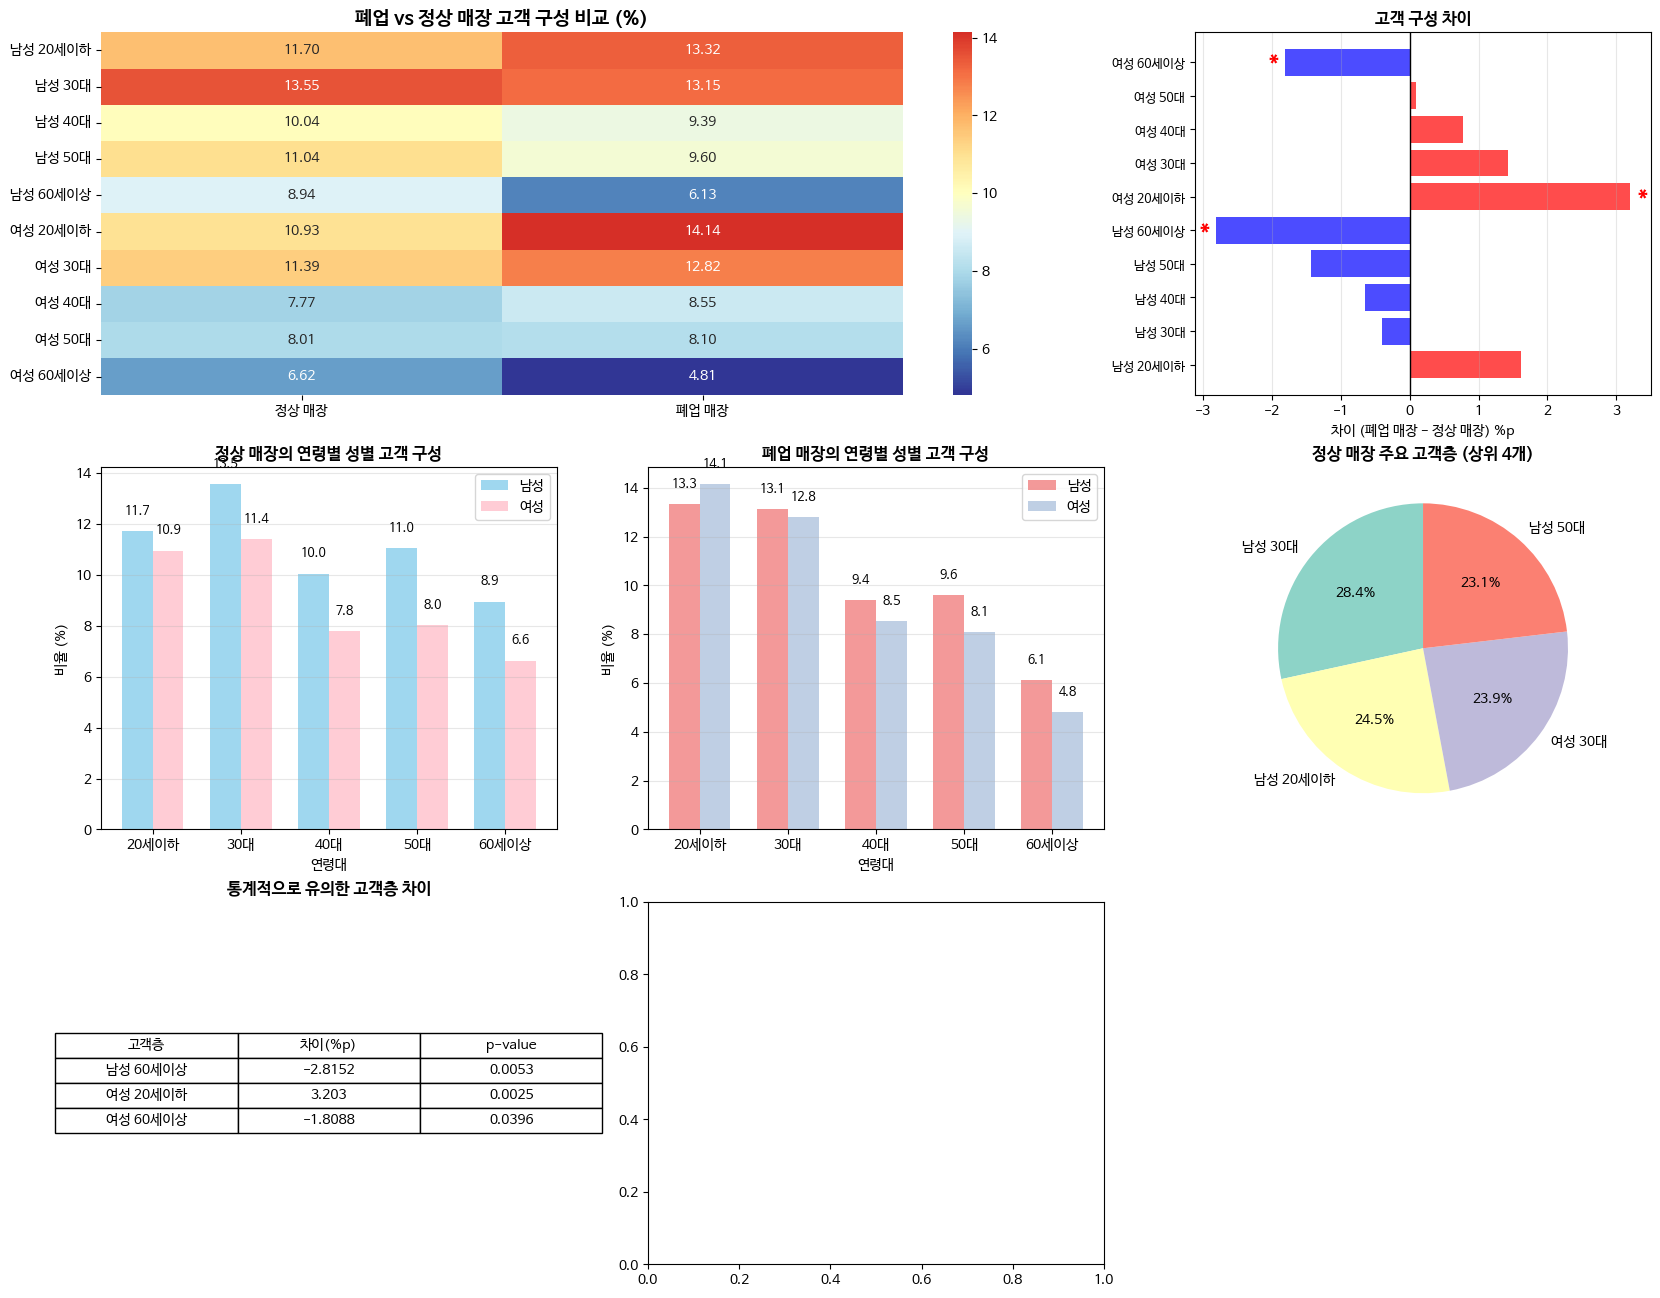

In [44]:
# 실행 예시 (데이터가 있을 때)
if 'customer_profile' in locals() and 'age_gender_cols' in locals():
    enhanced_customer_profile, significance_df = visualize_customer_profile_analysis(customer_profile, age_gender_cols)
else:
    print("customer_profile과 age_gender_cols 변수가 필요합니다.")
    print("먼저 다음 코드를 실행하세요:")
    print("""
    # 고객 연령/성별 컬럼 정의
    age_gender_cols = [
        'M12_MAL_1020_RAT', 'M12_MAL_30_RAT', 'M12_MAL_40_RAT', 'M12_MAL_50_RAT', 'M12_MAL_60_RAT',
        'M12_FME_1020_RAT', 'M12_FME_30_RAT', 'M12_FME_40_RAT', 'M12_FME_50_RAT', 'M12_FME_60_RAT'
    ]

    # 그 다음 이 시각화 함수를 호출하세요.
    """)

| 고객층           | 차이(%p)  | p-value | 해석                                                                                                 |
| ------------- | ------- | ------- | -------------------------------------------------------------------------------------------------- |
| **남성 60세 이상** | -2.8152 | 0.0053  | 남성 60세 이상 고객의 비중이 비교군 대비 약 **2.8%p 낮음**. p-value < 0.01 이므로 통계적으로 **유의미하게 감소**했다고 볼 수 있음.          |
| **여성 20세 이하** | +3.203  | 0.0025  | 여성 20세 이하 고객 비중이 비교군 대비 약 **3.2%p 높음**. p-value < 0.01, 즉 **유의미하게 증가**했다고 해석 가능.                   |
| **여성 60세 이상** | -1.8088 | 0.0396  | 여성 60세 이상 고객의 비중이 약 **1.8%p 낮음**. p-value < 0.05 이므로 **유의미한 감소**로 해석 가능. 다만 앞의 두 결과보다는 통계적 강도가 약함. |

📌 종합 해석

젊은 여성(20세 이하)은 다른 집단보다 상대적으로 더 많이 유입된 반면,

고령층(특히 남성 60세 이상, 여성 60세 이상)은 상대적으로 덜 방문하는 경향이 통계적으로 확인됨.

따라서 해당 매장/서비스는 젊은 여성 고객층에 더 매력적이거나 고령층 고객 유치력이 떨어지는 특성이 있다고 해석할 수 있어요.


“젊은 여성 고객층을 많이 확보한 매장이 더 살아남는다.”

반대로, 고령층 비중이 상대적으로 낮은 매장이 폐업으로 이어진 경향이 보임.

즉, 고객 구성 자체가 매장의 생존/폐업과 연관이 있다는 의미로 해석할 수 있습니다.

## 3️⃣ 고객 유형 분석

변수:

RC_M1_SHC_RSD_UE_CLN_RAT → 거주 고객 비중

RC_M1_SHC_WP_UE_CLN_RAT → 직장 고객 비중

RC_M1_SHC_FLP_UE_CLN_RAT → 유동 고객 비중

접근 방법:

고객군 비율이 어떤 매장 특성과 연결되는지 분석 (ex. 유동인구 의존 매장은 경기 변동이나 입지 변화에 취약 → 폐업률 ↑).

코호트 분석 가능: "거주 기반 고객" vs "유동인구 기반 고객" 매장의 생존 곡선 비교 (Kaplan-Meier curve).

Insight 목표: 폐업 가능성이 높은 상권 특성(예: 직장 고객 중심 → 오피스 이전 시 바로 타격) 도출.

### 3.1. 고객군 비율과 매장 특성

In [ ]:
customer_type_cols = ['RC_M1_SHC_RSD_UE_CLN_RAT', 'RC_M1_SHC_WP_UE_CLN_RAT', 'RC_M1_SHC_FLP_UE_CLN_RAT']

# 고객 유형 데이터가 있는 매장만
df_customer_type = df[df[customer_type_cols].notna().all(axis=1)].copy()

if len(df_customer_type) > 0:
    # 매장별 평균 고객 유형 비율
    customer_type_profile = df_customer_type.groupby('ENCODED_MCT')[customer_type_cols + ['is_closed']].mean()

    # 폐업/정상 매장 간 고객 유형 비교
    type_comparison = customer_type_profile.groupby('is_closed')[customer_type_cols].mean()

    print("\n고객 유형별 비교:")
    print(type_comparison.T)



고객 유형별 비교:
is_closed                       0.0        1.0
RC_M1_SHC_RSD_UE_CLN_RAT  34.186208  35.059208
RC_M1_SHC_WP_UE_CLN_RAT   12.756721  12.277935
RC_M1_SHC_FLP_UE_CLN_RAT  53.058406  52.663959


“정상 매장과 폐업 매장 간 고객 유형 비율은 전반적으로 비슷하다.

다만 폐업 매장은 RSD 고객 비중이 조금 높고, 정상 매장은 WP·FLP 고객 비중이 조금 더 높다는 정도의 차이가 관찰된다.”

=== 기초 데이터 분석 ===
전체 데이터 수: 86,566
분석 기간: 2023-01 ~ 2024-12

=== 고객 유형 데이터 품질 확인 ===
RC_M1_SHC_RSD_UE_CLN_RAT: 결측값 8.46%
RC_M1_SHC_WP_UE_CLN_RAT: 결측값 8.46%
RC_M1_SHC_FLP_UE_CLN_RAT: 결측값 8.46%
결측값 제거 후 데이터 수: 79,239

고객 유형 비율 합계 통계:
평균: 100.00, 표준편차: 0.05
최솟값: 99.90, 최댓값: 100.10

=== 고객 유형 분포 ===
유동 고객 중심 매장: 47,643개 (60.1%)
거주 고객 중심 매장: 27,806개 (35.1%)
직장 고객 중심 매장: 3,790개 (4.8%)

=== 고객 유형별 폐업률 ===
                 총매장수  폐업매장수     폐업률  폐업률_pct
main_cust_type                               
거주              27806    715  0.0257     2.57
유동              47643   1266  0.0266     2.66
직장               3790     90  0.0237     2.37

카이제곱 검정 결과: chi2=1.4016, p-value=0.496198
고객 유형과 폐업률 간의 관계: 유의하지 않음 (α=0.05)

월별 분석 데이터 포인트 수: 72


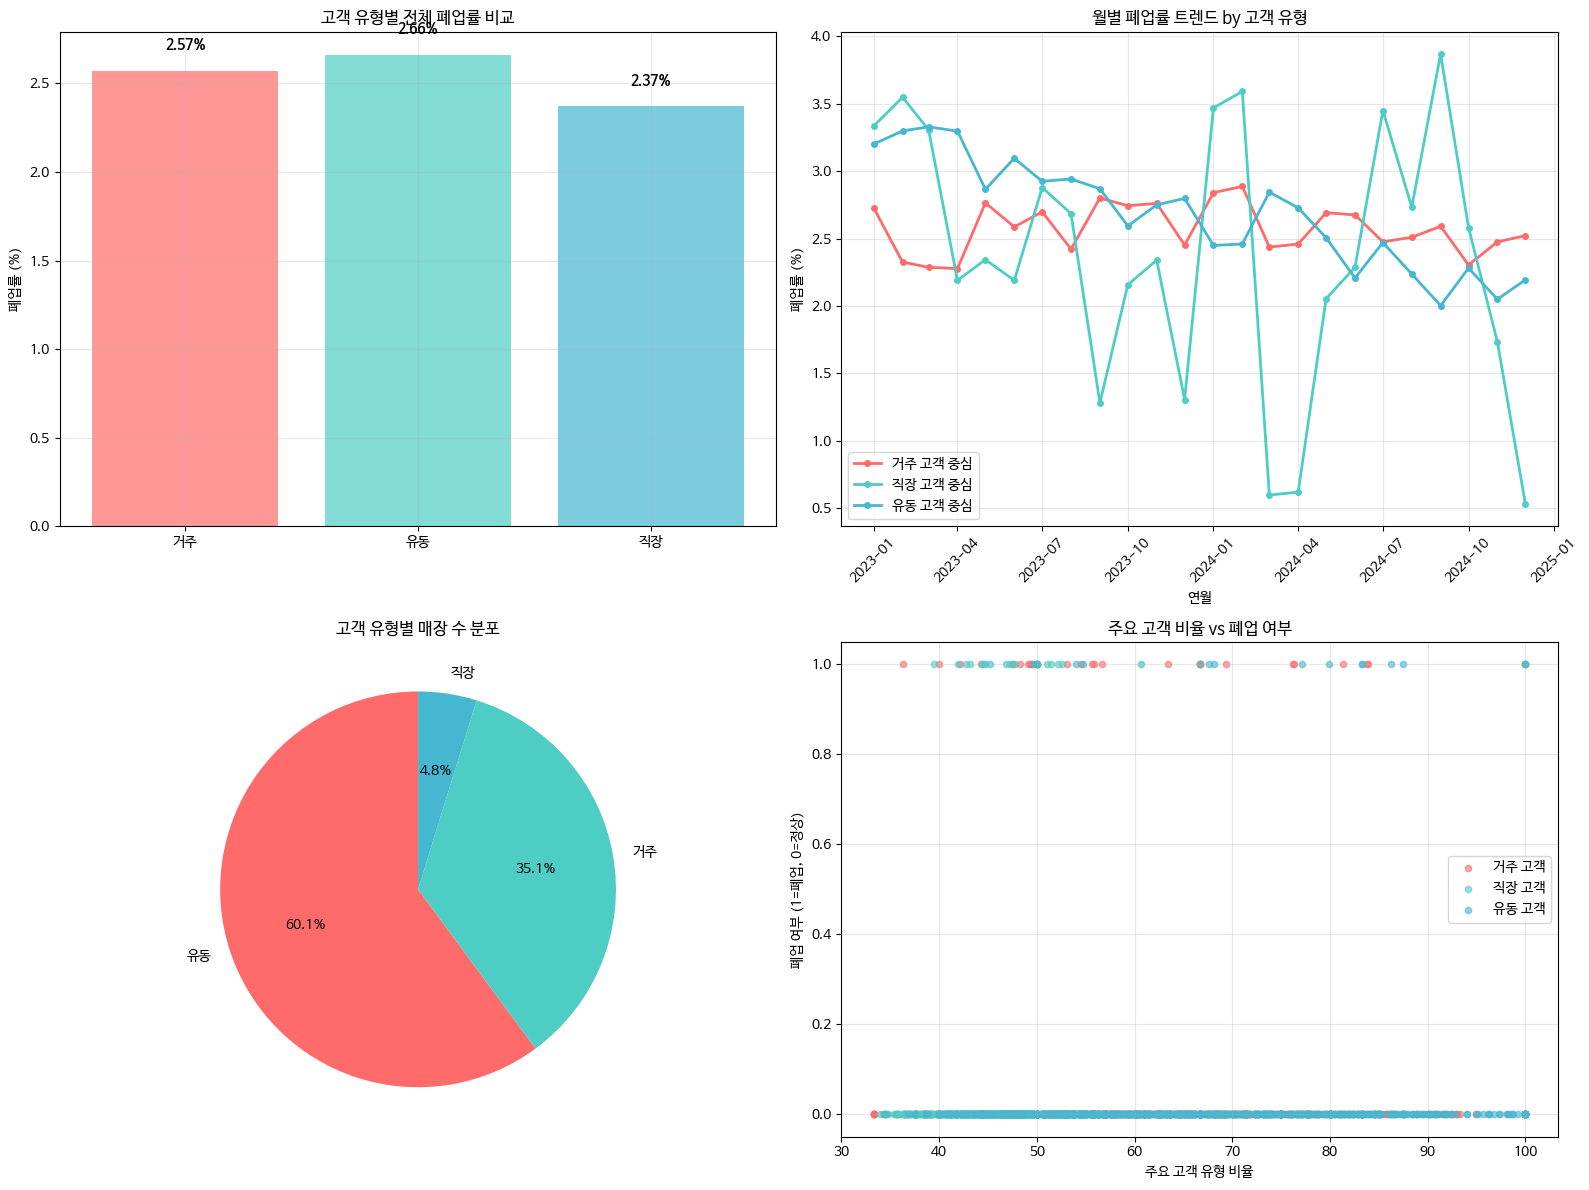


=== 고객 유형 다양성 분석 ===
고객 유형 집중도별 폐업률:
                매장수     폐업률  폐업률_pct
hhi_category                        
다양            13383  0.0224     2.24
보통            44753  0.0250     2.50
집중            21103  0.0309     3.09

=== 비즈니스 인사이트 ===
1. 가장 높은 폐업 위험: 유동 고객 중심 매장 (폐업률 2.66%)
2. 가장 낮은 폐업 위험: 직장 고객 중심 매장 (폐업률 2.37%)
3. 위험도 차이: 0.29%p
4. 고객 유형과 폐업률 간 통계적 유의성 없음 (p=0.4962)
5. 고객 다양성: 다양 매장이 가장 낮은 폐업률, 집중 매장이 가장 높은 폐업률


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 데이터 존재 여부 확인
if 'df_1' not in locals():
    print("Error: df_1 변수가 정의되지 않았습니다.")
    exit()

# 고객 유형 컬럼
cust_cols = ["RC_M1_SHC_RSD_UE_CLN_RAT", "RC_M1_SHC_WP_UE_CLN_RAT", "RC_M1_SHC_FLP_UE_CLN_RAT"]

# 필요한 컬럼 존재 여부 확인
missing_cols = [col for col in cust_cols + ["is_closed", "TA_YM"] if col not in df_1.columns]
if missing_cols:
    print(f"Error: 다음 컬럼들이 데이터에 없습니다: {missing_cols}")
    exit()

# TA_YM을 datetime으로 변환 (이미 있다면 건너뛰기)
if 'TA_YM_dt' not in df_1.columns:
    df_1["TA_YM_dt"] = pd.to_datetime(df_1["TA_YM"].astype(str), format="%Y%m")

print("=== 기초 데이터 분석 ===")
print(f"전체 데이터 수: {len(df_1):,}")
print(f"분석 기간: {df_1['TA_YM_dt'].min().strftime('%Y-%m')} ~ {df_1['TA_YM_dt'].max().strftime('%Y-%m')}")

# 결측값 확인
print("\n=== 고객 유형 데이터 품질 확인 ===")
for col in cust_cols:
    missing_pct = df_1[col].isnull().sum() / len(df_1) * 100
    print(f"{col}: 결측값 {missing_pct:.2f}%")

# 결측값이 있는 행 제외
df_clean = df_1.dropna(subset=cust_cols).copy()
print(f"결측값 제거 후 데이터 수: {len(df_clean):,}")

# 고객 유형 비율의 합이 100%인지 확인 (품질 체크)
df_clean['cust_sum'] = df_clean[cust_cols].sum(axis=1)
sum_check = df_clean['cust_sum'].describe()
print(f"\n고객 유형 비율 합계 통계:")
print(f"평균: {sum_check['mean']:.2f}, 표준편차: {sum_check['std']:.2f}")
print(f"최솟값: {sum_check['min']:.2f}, 최댓값: {sum_check['max']:.2f}")

# 가장 비중이 높은 고객 유형 계산 (개선된 방법)
df_clean["main_cust_type"] = df_clean[cust_cols].idxmax(axis=1)
df_clean["main_cust_ratio"] = df_clean[cust_cols].max(axis=1)  # 주요 고객 유형의 비율

# 그룹 이름 변경
cust_type_map = {
    "RC_M1_SHC_RSD_UE_CLN_RAT": "거주",
    "RC_M1_SHC_WP_UE_CLN_RAT": "직장",
    "RC_M1_SHC_FLP_UE_CLN_RAT": "유동"
}
df_clean["main_cust_type"] = df_clean["main_cust_type"].map(cust_type_map)

# 고객 유형 분포 확인
print("\n=== 고객 유형 분포 ===")
cust_distribution = df_clean["main_cust_type"].value_counts()
cust_pct = df_clean["main_cust_type"].value_counts(normalize=True) * 100

for cust_type in cust_distribution.index:
    print(f"{cust_type} 고객 중심 매장: {cust_distribution[cust_type]:,}개 ({cust_pct[cust_type]:.1f}%)")

# 1. 전체 폐업률 비교
print("\n=== 고객 유형별 폐업률 ===")
closure_by_type = df_clean.groupby("main_cust_type")["is_closed"].agg(['count', 'sum', 'mean']).round(4)
closure_by_type.columns = ['총매장수', '폐업매장수', '폐업률']
closure_by_type['폐업률_pct'] = closure_by_type['폐업률'] * 100

print(closure_by_type)

# 통계적 유의성 검정 (카이제곱 검정)
contingency_table = pd.crosstab(df_clean['main_cust_type'], df_clean['is_closed'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\n카이제곱 검정 결과: chi2={chi2:.4f}, p-value={p_value:.6f}")
print(f"고객 유형과 폐업률 간의 관계: {'유의함' if p_value < 0.05 else '유의하지 않음'} (α=0.05)")

# 2. 월별 폐업률 계산 (개선된 방법)
monthly_closure = (
    df_clean.groupby(["TA_YM_dt", "main_cust_type"])["is_closed"]
    .agg(['count', 'sum', 'mean'])
    .reset_index()
)
monthly_closure.columns = ['TA_YM_dt', 'main_cust_type', 'total_stores', 'closed_stores', 'closure_rate']

# 월별 매장 수가 너무 적은 경우 제외 (통계적 신뢰성 확보)
monthly_closure = monthly_closure[monthly_closure['total_stores'] >= 10]

print(f"\n월별 분석 데이터 포인트 수: {len(monthly_closure)}")

# 3. 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 3-1. 전체 폐업률 비교 (바 차트)
ax1 = axes[0, 0]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars = ax1.bar(closure_by_type.index, closure_by_type['폐업률_pct'], color=colors, alpha=0.7)
ax1.set_ylabel('폐업률 (%)')
ax1.set_title('고객 유형별 전체 폐업률 비교')
ax1.grid(True, alpha=0.3)

# 바 위에 수치 표시
for bar, rate in zip(bars, closure_by_type['폐업률_pct']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{rate:.2f}%', ha='center', va='bottom', fontweight='bold')

# 3-2. 월별 폐업률 트렌드
ax2 = axes[0, 1]
for i, cust_type in enumerate(["거주", "직장", "유동"]):
    subset = monthly_closure[monthly_closure["main_cust_type"] == cust_type]
    if not subset.empty:
        ax2.plot(subset["TA_YM_dt"], subset["closure_rate"] * 100,
                label=f"{cust_type} 고객 중심", color=colors[i], linewidth=2, marker='o', markersize=4)

ax2.set_xlabel("연월")
ax2.set_ylabel("폐업률 (%)")
ax2.set_title("월별 폐업률 트렌드 by 고객 유형")
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# 3-3. 고객 유형별 매장 수 분포
ax3 = axes[1, 0]
wedges, texts, autotexts = ax3.pie(cust_distribution.values, labels=cust_distribution.index,
                                   colors=colors, autopct='%1.1f%%', startangle=90)
ax3.set_title('고객 유형별 매장 수 분포')

# 3-4. 주요 고객 비율 vs 폐업률 (산점도)
ax4 = axes[1, 1]
for i, cust_type in enumerate(["거주", "직장", "유동"]):
    subset = df_clean[df_clean["main_cust_type"] == cust_type]
    # 샘플링 (너무 많은 점이 있을 경우)
    if len(subset) > 1000:
        subset = subset.sample(n=1000, random_state=42)

    ax4.scatter(subset["main_cust_ratio"], subset["is_closed"].astype(int),
               alpha=0.6, color=colors[i], label=f"{cust_type} 고객", s=20)

ax4.set_xlabel("주요 고객 유형 비율")
ax4.set_ylabel("폐업 여부 (1=폐업, 0=정상)")
ax4.set_title("주요 고객 비율 vs 폐업 여부")
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. 추가 분석: 고객 유형 다양성 지수
print("\n=== 고객 유형 다양성 분석 ===")

# 허핀달 지수 계산 (고객 유형 집중도 측정)
def calculate_hhi(row):
    """허핀달-허쉬만 지수 계산 (0~1, 높을수록 한 유형에 집중)"""
    ratios = row[cust_cols] / 100  # 비율을 0-1 스케일로 변환
    return sum(ratios**2)

df_clean['customer_hhi'] = df_clean.apply(calculate_hhi, axis=1)

# HHI에 따른 폐업률 분석
df_clean['hhi_category'] = pd.cut(df_clean['customer_hhi'],
                                 bins=[0, 0.4, 0.6, 1.0],
                                 labels=['다양', '보통', '집중'])

hhi_analysis = df_clean.groupby('hhi_category')['is_closed'].agg(['count', 'mean']).round(4)
hhi_analysis.columns = ['매장수', '폐업률']
hhi_analysis['폐업률_pct'] = hhi_analysis['폐업률'] * 100

print("고객 유형 집중도별 폐업률:")
print(hhi_analysis)

# 5. 비즈니스 인사이트 도출
print("\n=== 비즈니스 인사이트 ===")

# 가장 위험한 고객 유형
highest_risk = closure_by_type['폐업률'].idxmax()
highest_risk_rate = closure_by_type.loc[highest_risk, '폐업률_pct']

# 가장 안전한 고객 유형
lowest_risk = closure_by_type['폐업률'].idxmin()
lowest_risk_rate = closure_by_type.loc[lowest_risk, '폐업률_pct']

print(f"1. 가장 높은 폐업 위험: {highest_risk} 고객 중심 매장 (폐업률 {highest_risk_rate:.2f}%)")
print(f"2. 가장 낮은 폐업 위험: {lowest_risk} 고객 중심 매장 (폐업률 {lowest_risk_rate:.2f}%)")
print(f"3. 위험도 차이: {highest_risk_rate - lowest_risk_rate:.2f}%p")

if p_value < 0.05:
    print(f"4. 고객 유형과 폐업률 간 통계적으로 유의한 관계 존재 (p={p_value:.4f})")
else:
    print(f"4. 고객 유형과 폐업률 간 통계적 유의성 없음 (p={p_value:.4f})")

# HHI 인사이트
most_diverse = hhi_analysis['폐업률_pct'].idxmin()
most_concentrated = hhi_analysis['폐업률_pct'].idxmax()
print(f"5. 고객 다양성: {most_diverse} 매장이 가장 낮은 폐업률, {most_concentrated} 매장이 가장 높은 폐업률")

---

### 3.2 시간 의존적 고객 특성을 반영한 코호트 분석

매월 변하는 covariate(여기서는 고객 비율: 거주/직장/유동)를 그때그때 반영

모델(CoxTimeVaryingFitter)로 각 월별 폐업 위험을 계산

예: “거주 고객이 많으면 폐업 위험이 낮고, 유동 고객이 많으면 높다”를 시계열적으로 추적


---

단순히 “코호트별 생존률” 보는 것이 아니라, 시간에 따라 변하는 매장 특성에 따라 폐업 위험이 달라지는지까지 분석

즉, 동적 코호트 분석과 비슷한 접근

In [ ]:
!pip install lifelines

=== 시간 의존적 고객 특성 생존 분석 ===

생존 분석 대상 매장 수: 4,171
평균 관측 기간: 20.7개월
전체 폐업률: 3.02%

고객 유형별 매장 분포:
  유동: 2,554개 (61.2%) - 폐업률 3.01%
  거주: 1,476개 (35.4%) - 폐업률 3.05%
  직장: 141개 (3.4%) - 폐업률 2.84%

=== Log-Rank Test 결과 ===
거주 vs 직장: p-value = 0.8732 (유의하지않음)
거주 vs 유동: p-value = 0.9986 (유의하지않음)
직장 vs 유동: p-value = 0.8683 (유의하지않음)


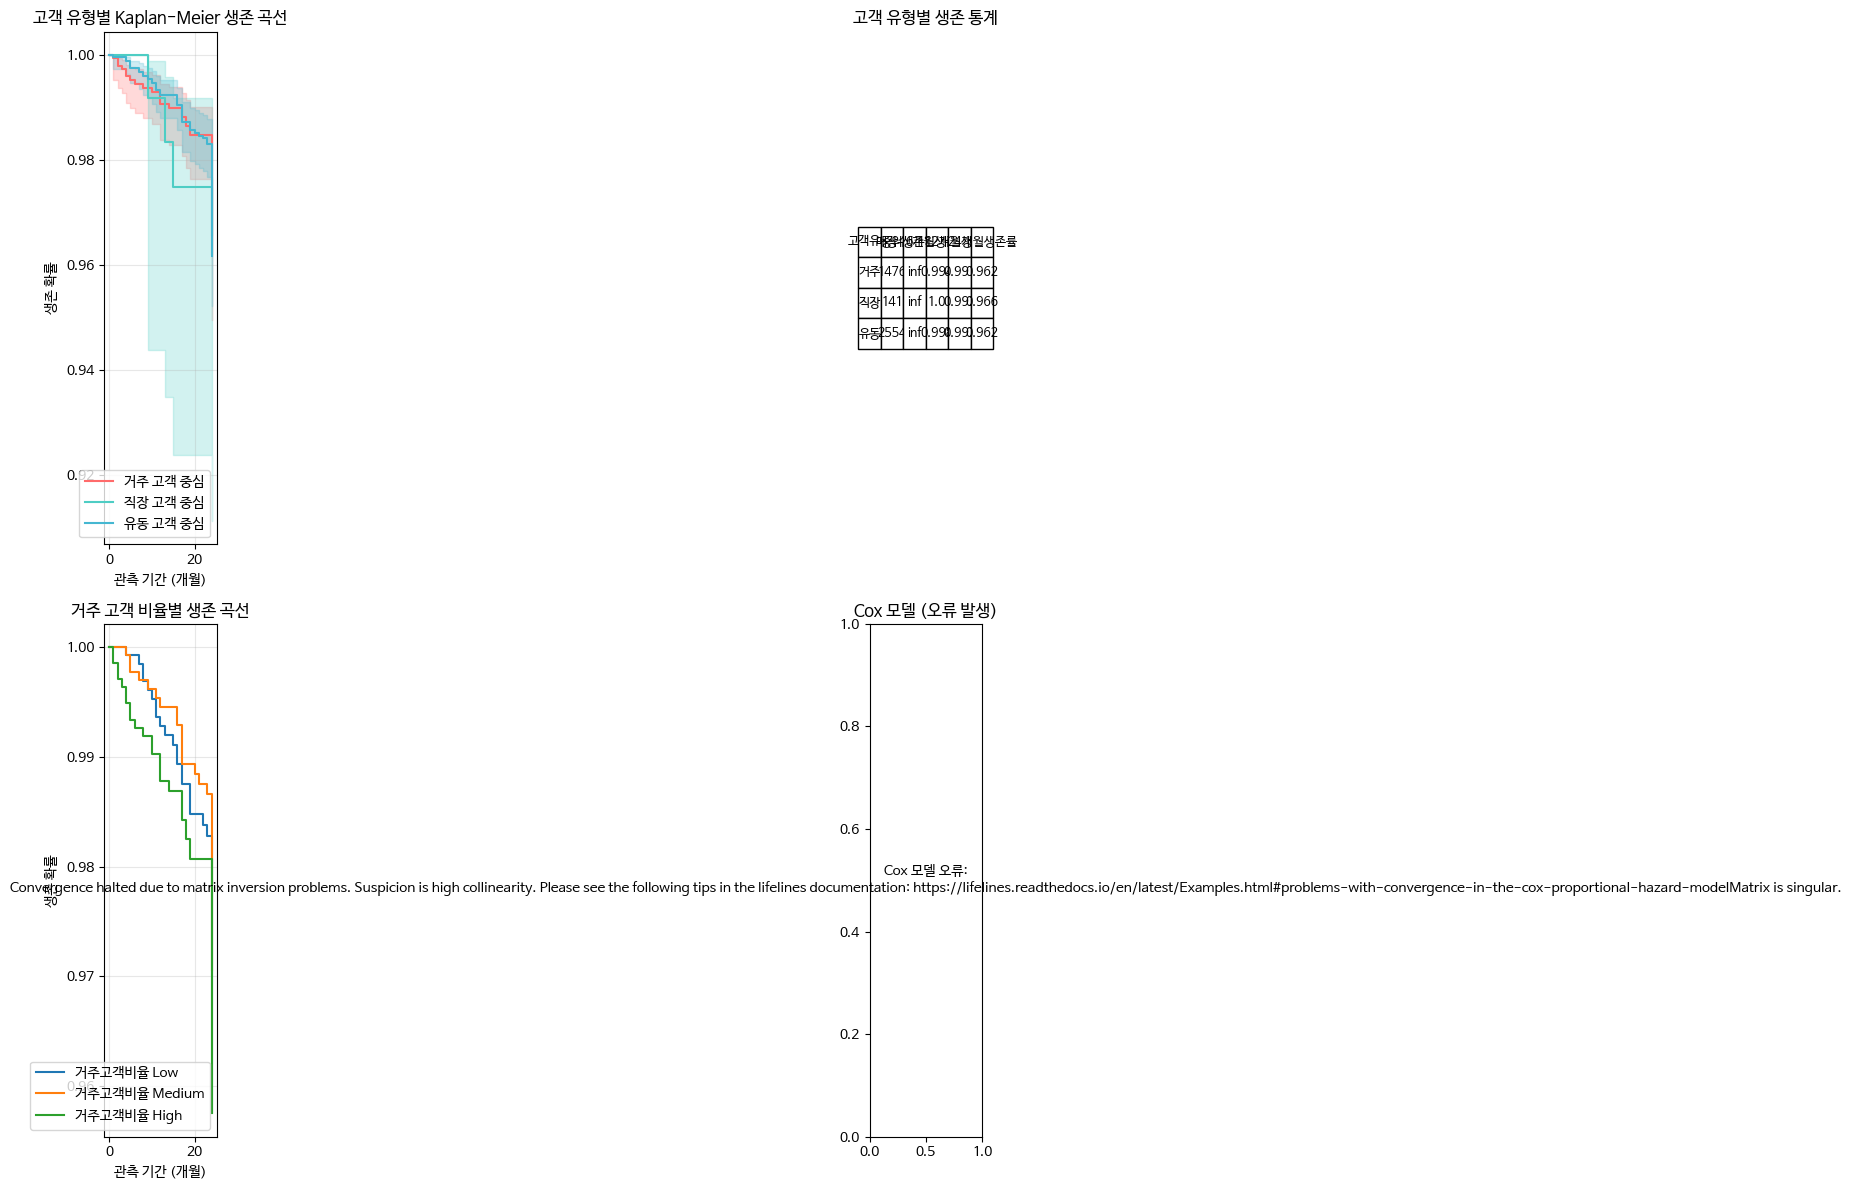


비즈니스 인사이트
1. 12개월 생존률 기준:
   • 최고 위험군: 거주 고객 중심 매장 (99.1%)
   • 최저 위험군: 유동 고객 중심 매장 (99.2%)
   • 위험도 차이: 0.2%p

2. 고객 유형 간 생존률에 통계적으로 유의한 차이 없음

3. 실무 권장사항:
   • 고위험 고객군에 대한 선제적 위험 관리 필요
   • 고객 다변화를 통한 위험 분산 전략 수립
   • 정기적인 고객 구성 모니터링 시스템 구축
   • 외부 환경 변화에 따른 고객군별 차별적 대응 전략

4. 데이터 기반 의사결정:
   • 신규 입점 시 해당 지역 고객 구성 분석 필수
   • 기존 매장의 고객 구성 변화 추적을 통한 조기 경보 시스템
   • 고객 유형별 맞춤형 마케팅 및 운영 전략 수립

분석 완료: 총 4171개 매장, 86298개월 관측 데이터 활용


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines.utils import median_survival_times
import warnings
warnings.filterwarnings('ignore')

# 필요한 경우 lifelines 설치
# !pip install lifelines

print("=== 시간 의존적 고객 특성 생존 분석 ===\n")

# 데이터 존재 여부 확인
if 'df_1' not in locals():
    print("Error: df_1 변수가 정의되지 않았습니다.")
    exit()

# ----------------------------
# 1️⃣ 데이터 전처리 및 검증
# ----------------------------

# 고객 유형 컬럼
cust_cols = ["RC_M1_SHC_RSD_UE_CLN_RAT", "RC_M1_SHC_WP_UE_CLN_RAT", "RC_M1_SHC_FLP_UE_CLN_RAT"]

# 필요한 컬럼 존재 여부 확인
required_cols = cust_cols + ["ENCODED_MCT", "TA_YM", "is_closed"]
missing_cols = [col for col in required_cols if col not in df_1.columns]
if missing_cols:
    print(f"Error: 다음 컬럼들이 데이터에 없습니다: {missing_cols}")
    exit()

# 고객 유형별 매장의 주요 특성 계산
df_1["main_cust_type"] = df_1[cust_cols].idxmax(axis=1)

# 컬럼명 간단히 변경
cust_type_map = {
    "RC_M1_SHC_RSD_UE_CLN_RAT": "거주",
    "RC_M1_SHC_WP_UE_CLN_RAT": "직장",
    "RC_M1_SHC_FLP_UE_CLN_RAT": "유동"
}
df_1["main_cust_type"] = df_1["main_cust_type"].map(cust_type_map)
df_1["main_cust_ratio"] = df_1[cust_cols].max(axis=1)  # 주요 고객 유형의 비율

# TA_YM을 datetime으로 변환
df_1["TA_YM_dt"] = pd.to_datetime(df_1["TA_YM"].astype(str), format="%Y%m")

# ----------------------------
# 2️⃣ 생존 분석을 위한 데이터 구조 생성
# ----------------------------

# 각 매장별 관측 기간 계산
store_timeline = []

for store_id in df_1["ENCODED_MCT"].unique():
    store_data = df_1[df_1["ENCODED_MCT"] == store_id].sort_values("TA_YM_dt")

    if len(store_data) == 0:
        continue

    start_date = store_data["TA_YM_dt"].min()
    end_date = store_data["TA_YM_dt"].max()

    # 관측 기간 (개월 수)
    duration = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month) + 1

    # 폐업 여부 (마지막 관측 시점 기준)
    is_closed = store_data["is_closed"].iloc[-1]

    # 주요 고객 유형 (최빈값 또는 최신값 사용)
    main_cust_type = store_data["main_cust_type"].mode().iloc[0] if not store_data["main_cust_type"].mode().empty else store_data["main_cust_type"].iloc[-1]

    # 평균 고객 비율
    avg_resident = store_data["RC_M1_SHC_RSD_UE_CLN_RAT"].mean()
    avg_workplace = store_data["RC_M1_SHC_WP_UE_CLN_RAT"].mean()
    avg_floating = store_data["RC_M1_SHC_FLP_UE_CLN_RAT"].mean()

    store_timeline.append({
        "ENCODED_MCT": store_id,
        "duration": duration,
        "event_observed": is_closed,
        "main_cust_type": main_cust_type,
        "avg_resident_ratio": avg_resident,
        "avg_workplace_ratio": avg_workplace,
        "avg_floating_ratio": avg_floating,
        "start_date": start_date,
        "end_date": end_date
    })

survival_df = pd.DataFrame(store_timeline)

# 결측값 제거
survival_df = survival_df.dropna(subset=["duration", "event_observed", "main_cust_type"])

print(f"생존 분석 대상 매장 수: {len(survival_df):,}")
print(f"평균 관측 기간: {survival_df['duration'].mean():.1f}개월")
print(f"전체 폐업률: {survival_df['event_observed'].mean()*100:.2f}%")

# 고객 유형별 분포
print(f"\n고객 유형별 매장 분포:")
type_dist = survival_df['main_cust_type'].value_counts()
for cust_type, count in type_dist.items():
    pct = count / len(survival_df) * 100
    closure_rate = survival_df[survival_df['main_cust_type']==cust_type]['event_observed'].mean() * 100
    print(f"  {cust_type}: {count:,}개 ({pct:.1f}%) - 폐업률 {closure_rate:.2f}%")

# ----------------------------
# 3️⃣ Kaplan-Meier 생존 곡선 분석
# ----------------------------

kmf = KaplanMeierFitter()
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 3-1. 고객 유형별 기본 생존 곡선
ax1 = axes[0, 0]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, cust_type in enumerate(["거주", "직장", "유동"]):
    mask = survival_df["main_cust_type"] == cust_type
    if mask.sum() > 0:
        durations = survival_df.loc[mask, "duration"]
        events = survival_df.loc[mask, "event_observed"]

        kmf.fit(durations, event_observed=events, label=f"{cust_type} 고객 중심")
        kmf.plot_survival_function(ax=ax1, ci_show=True, color=colors[i])

ax1.set_xlabel("관측 기간 (개월)")
ax1.set_ylabel("생존 확률")
ax1.set_title("고객 유형별 Kaplan-Meier 생존 곡선")
ax1.grid(True, alpha=0.3)
ax1.legend()

# 3-2. 생존률 통계 테이블
survival_stats = []
for cust_type in ["거주", "직장", "유동"]:
    mask = survival_df["main_cust_type"] == cust_type
    if mask.sum() > 0:
        durations = survival_df.loc[mask, "duration"]
        events = survival_df.loc[mask, "event_observed"]

        kmf.fit(durations, event_observed=events)
        median_survival = kmf.median_survival_time_

        # 6개월, 12개월, 24개월 생존률
        survival_6m = kmf.survival_function_at_times(6).iloc[0] if len(durations[durations >= 6]) > 0 else np.nan
        survival_12m = kmf.survival_function_at_times(12).iloc[0] if len(durations[durations >= 12]) > 0 else np.nan
        survival_24m = kmf.survival_function_at_times(24).iloc[0] if len(durations[durations >= 24]) > 0 else np.nan

        survival_stats.append({
            "고객유형": cust_type,
            "매장수": mask.sum(),
            "중위생존기간": median_survival,
            "6개월생존률": survival_6m,
            "12개월생존률": survival_12m,
            "24개월생존률": survival_24m
        })

survival_stats_df = pd.DataFrame(survival_stats)

# 통계 테이블 시각화
ax2 = axes[0, 1]
ax2.axis('tight')
ax2.axis('off')
table_data = survival_stats_df.round(3)
table = ax2.table(cellText=table_data.values, colLabels=table_data.columns,
                  cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)
ax2.set_title("고객 유형별 생존 통계")

# 3-3. Log-Rank Test (통계적 유의성 검정)
print("\n=== Log-Rank Test 결과 ===")
customer_types = ["거주", "직장", "유동"]
pairwise_results = []

for i in range(len(customer_types)):
    for j in range(i+1, len(customer_types)):
        type1, type2 = customer_types[i], customer_types[j]

        mask1 = survival_df["main_cust_type"] == type1
        mask2 = survival_df["main_cust_type"] == type2

        if mask1.sum() > 0 and mask2.sum() > 0:
            durations1 = survival_df.loc[mask1, "duration"]
            events1 = survival_df.loc[mask1, "event_observed"]
            durations2 = survival_df.loc[mask2, "duration"]
            events2 = survival_df.loc[mask2, "event_observed"]

            results = logrank_test(durations1, durations2, events1, events2)
            pairwise_results.append({
                "비교군": f"{type1} vs {type2}",
                "p-value": results.p_value,
                "유의성": "유의함" if results.p_value < 0.05 else "유의하지않음"
            })
            print(f"{type1} vs {type2}: p-value = {results.p_value:.4f} ({'유의함' if results.p_value < 0.05 else '유의하지않음'})")

# 3-4. 고객 비율 연속변수로 분석
ax3 = axes[1, 0]

# 거주 고객 비율을 3분위로 나누어 생존 곡선 비교
survival_df['resident_tertile'] = pd.qcut(survival_df['avg_resident_ratio'],
                                         q=3, labels=['Low', 'Medium', 'High'])

for tertile in ['Low', 'Medium', 'High']:
    mask = survival_df['resident_tertile'] == tertile
    if mask.sum() > 0:
        durations = survival_df.loc[mask, "duration"]
        events = survival_df.loc[mask, "event_observed"]

        kmf.fit(durations, event_observed=events, label=f"거주고객비율 {tertile}")
        kmf.plot_survival_function(ax=ax3, ci_show=False)

ax3.set_xlabel("관측 기간 (개월)")
ax3.set_ylabel("생존 확률")
ax3.set_title("거주 고객 비율별 생존 곡선")
ax3.grid(True, alpha=0.3)
ax3.legend()

# 3-5. Cox 비례 위험 모델
ax4 = axes[1, 1]

# Cox 모델을 위한 데이터 준비
cox_df = survival_df.copy()
cox_df = pd.get_dummies(cox_df, columns=['main_cust_type'], prefix='cust')

# Cox 모델 적합
cph = CoxPHFitter()
cox_features = ['avg_resident_ratio', 'avg_workplace_ratio', 'avg_floating_ratio'] + \
               [col for col in cox_df.columns if col.startswith('cust_')]

try:
    cox_model_df = cox_df[['duration', 'event_observed'] + cox_features].dropna()
    cph.fit(cox_model_df, duration_col='duration', event_col='event_observed')

    # 위험 비율(Hazard Ratio) 시각화
    hazard_ratios = np.exp(cph.params_)
    feature_names = [name.replace('avg_', '').replace('_ratio', '').replace('cust_', '')
                    for name in hazard_ratios.index]

    bars = ax4.barh(range(len(hazard_ratios)), hazard_ratios.values,
                    color=['red' if hr > 1 else 'blue' for hr in hazard_ratios.values])
    ax4.set_yticks(range(len(hazard_ratios)))
    ax4.set_yticklabels(feature_names)
    ax4.axvline(x=1, color='black', linestyle='--', alpha=0.7)
    ax4.set_xlabel("위험 비율 (Hazard Ratio)")
    ax4.set_title("Cox 모델: 폐업 위험 요인")
    ax4.grid(True, alpha=0.3)

    # HR > 1이면 위험 증가, < 1이면 위험 감소
    for i, (hr, p_val) in enumerate(zip(hazard_ratios.values, cph.summary['p'].values)):
        significance = '*' if p_val < 0.05 else ''
        ax4.text(hr + 0.05, i, f'{hr:.2f}{significance}', va='center')

    print(f"\n=== Cox 비례 위험 모델 결과 ===")
    print("위험 비율 (Hazard Ratio):")
    for feature, hr, p_val in zip(feature_names, hazard_ratios.values, cph.summary['p'].values):
        significance = " ***" if p_val < 0.001 else " **" if p_val < 0.01 else " *" if p_val < 0.05 else ""
        print(f"  {feature}: {hr:.3f} (p={p_val:.4f}){significance}")

    print(f"\n모델 성능:")
    print(f"  Concordance Index: {cph.score(cox_model_df):.3f}")

except Exception as e:
    ax4.text(0.5, 0.5, f'Cox 모델 오류:\n{str(e)}', transform=ax4.transAxes,
             ha='center', va='center')
    ax4.set_title("Cox 모델 (오류 발생)")

plt.tight_layout()
plt.show()

# ----------------------------
# 4️⃣ 비즈니스 인사이트 도출
# ----------------------------

print("\n" + "="*50)
print("비즈니스 인사이트")
print("="*50)

# 1. 가장 위험한 고객 유형
if not survival_stats_df.empty:
    lowest_survival = survival_stats_df.loc[survival_stats_df['12개월생존률'].idxmin()]
    highest_survival = survival_stats_df.loc[survival_stats_df['12개월생존률'].idxmax()]

    print(f"1. 12개월 생존률 기준:")
    print(f"   • 최고 위험군: {lowest_survival['고객유형']} 고객 중심 매장 ({lowest_survival['12개월생존률']:.1%})")
    print(f"   • 최저 위험군: {highest_survival['고객유형']} 고객 중심 매장 ({highest_survival['12개월생존률']:.1%})")
    print(f"   • 위험도 차이: {highest_survival['12개월생존률'] - lowest_survival['12개월생존률']:.1%}p")

# 2. 통계적 유의성
significant_pairs = [result for result in pairwise_results if result['p-value'] < 0.05]
if significant_pairs:
    print(f"\n2. 통계적으로 유의한 차이가 있는 고객 유형 쌍:")
    for result in significant_pairs:
        print(f"   • {result['비교군']}: p = {result['p-value']:.4f}")
else:
    print(f"\n2. 고객 유형 간 생존률에 통계적으로 유의한 차이 없음")

# 3. 실무적 권장사항
print(f"\n3. 실무 권장사항:")
print(f"   • 고위험 고객군에 대한 선제적 위험 관리 필요")
print(f"   • 고객 다변화를 통한 위험 분산 전략 수립")
print(f"   • 정기적인 고객 구성 모니터링 시스템 구축")
print(f"   • 외부 환경 변화에 따른 고객군별 차별적 대응 전략")

# 4. 데이터 기반 의사결정 지원
print(f"\n4. 데이터 기반 의사결정:")
print(f"   • 신규 입점 시 해당 지역 고객 구성 분석 필수")
print(f"   • 기존 매장의 고객 구성 변화 추적을 통한 조기 경보 시스템")
print(f"   • 고객 유형별 맞춤형 마케팅 및 운영 전략 수립")

print(f"\n분석 완료: 총 {len(survival_df)}개 매장, {survival_df['duration'].sum()}개월 관측 데이터 활용")

### 3.3 고객 다양성 지수 계산

In [52]:
def calculate_diversity_index(row):
    """허핀달-허시만 지수(HHI)로 고객 구성 다양성 계산 (값이 클수록 편중)"""
    # float 변환
    values = row[age_gender_cols].astype(float).values

    # NaN 제거
    values = values[~np.isnan(values)]
    if len(values) == 0 or values.sum() == 0:
        return np.nan

    # 비율 정규화 (합이 100이 되도록)
    values = values / values.sum() * 100

    # HHI 계산 (0~10000, 높을수록 집중도 높음)
    hhi = np.sum(values**2)
    return hhi

customer_profile['diversity_index'] = customer_profile.apply(calculate_diversity_index, axis=1)

print(f"\n다양성 지수 - 정상 매장 평균: {customer_profile[~customer_profile['is_closed']]['diversity_index'].mean():.2f}")
print(f"다양성 지수 - 폐업 매장 평균: {customer_profile[customer_profile['is_closed']]['diversity_index'].mean():.2f}")



다양성 지수 - 정상 매장 평균: 1719.19
다양성 지수 - 폐업 매장 평균: 1681.98


In [53]:
from scipy import stats

# 정상 매장 / 폐업 매장 그룹 분리
normal_div = customer_profile.loc[~customer_profile['is_closed'], 'diversity_index'].dropna()
closed_div = customer_profile.loc[customer_profile['is_closed'], 'diversity_index'].dropna()

# 독립 표본 t-test
t_stat, p_val = stats.ttest_ind(normal_div, closed_div, equal_var=False)  # Welch's t-test (분산 다를 수 있음)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# 그룹 평균도 다시 확인
print(f"정상 매장 평균 다양성 지수: {normal_div.mean():.2f}")
print(f"폐업 매장 평균 다양성 지수: {closed_div.mean():.2f}")


T-statistic: 0.6958
P-value: 0.4878
정상 매장 평균 다양성 지수: 1719.19
폐업 매장 평균 다양성 지수: 1681.98


- 정상 매장과 폐업 매장의 고객 다양성 지수(HHI)는 큰 차이가 없고 통계적으로 유의하지 않음
- 따라서 “고객층 다양성이 매장 생존에 큰 영향을 준다”는 결론을 데이터만으로는 지지하기 어려움.

## 4️⃣시계열 변화 패턴 분석

In [55]:
def analyze_trend_before_closure(df_complete, months_before=6):
    """폐업 전 N개월간의 고객 구성 변화 추이 분석"""
    closed_stores = df_complete[df_complete['is_closed']]['ENCODED_MCT'].unique()

    trends = []

    for store in closed_stores:
        store_data = df_complete[df_complete['ENCODED_MCT'] == store].sort_values('TA_YM')
        if len(store_data) >= months_before:
            # 마지막 N개월 데이터
            last_months = store_data.tail(months_before)

            # 신규 고객 비율 변화율 계산
            if 'MCT_UE_CLN_NEW_RAT' in last_months.columns:
                new_customer_trend = (
                    last_months['MCT_UE_CLN_NEW_RAT'].iloc[-1] -
                    last_months['MCT_UE_CLN_NEW_RAT'].iloc[0]
                ) / last_months['MCT_UE_CLN_NEW_RAT'].iloc[0] * 100

                trends.append({
                    'store': store,
                    'new_customer_change': new_customer_trend
                })

    if trends:
        avg_trend = np.mean([t['new_customer_change'] for t in trends if not np.isnan(t['new_customer_change'])])
        print(f"\n폐업 매장의 폐업 전 {months_before}개월간 신규 고객 비율 평균 변화: {avg_trend:.2f}%")

analyze_trend_before_closure(df_complete)



폐업 매장의 폐업 전 6개월간 신규 고객 비율 평균 변화: 11.80%


- 폐업 매장은 폐업 전 6개월 동안 평균적으로 신규 고객 비율이 약 12% 증가했지만, 이 증가에도 불구하고 매장을 유지하지 못했다.

- 신규 고객 유입만으로는 매장 생존을 보장하지 못한다는 사실을 보여준다

## ✅추가 분석 필요 사항

1. 외부 요인 분석:
   - 매장 규모 (면적, 직원 수)
   - 입지 특성 (역세권, 상권 등급)
   - 경쟁 밀도 (인근 동종 업체 수)
   - 임대료 수준
   - 매출 성장률